<a href="https://colab.research.google.com/github/mirco-heidemann/NGFS/blob/main/NGFS_EnTryParameterGuide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase IV Guide on available models, regions and variable types

---

*Launch Version (1.0)*

---

For feedback, please participate in our user survey [here](https://www.surveymonkey.de/r/C68V37M).

-------


*For support on the use of Google Colab, please refer to the [FAQ](https://research.google.com/colaboratory/faq.html).*

*For questions and comments on the NGFS scripts and their application, please reach out to Clemens Lehofer (clemens-maria.lehofer@ecb.europa.eu) or Mario Morelli (mario.morelli@ecb.europa.eu).*

---

---

**Scenario data from the IIASA Scenario Explorer is provided across several dimensions including variables, models and regions. Data availabilities differ for possible combinations and come with navigation challenges.**

Models and their respective query names can be divided in the three variable categories the NGFS scenarios provide: Physical, transition and macro-financial.

Each model provides its data at different regional granularity.


*   **IAM data** is natively available for specific aggregated regions.
*   For comparison, transition data is availabe for aggregated regions there are specifically created R5 comparative regions.
*   For country-level data, downscaled versions of the IAMs exist.


*   **NiGEM data** is based on inputs from the three IAMs respectively. It's acute physical risk data derives from specific modelling under Climate Analytics.
*  NiGEM data is provided for a specific set of countries and aggregate regions.



Additionally, scenario availability differs by variable.

A simplified overview of the different dimensions is provided below.

----

*Find the full list of parameters and their full names under the IIASA Scenario Explorer documentation tab. See the Technical Documentation for context and more details on available models, variables and other parameters.*

----

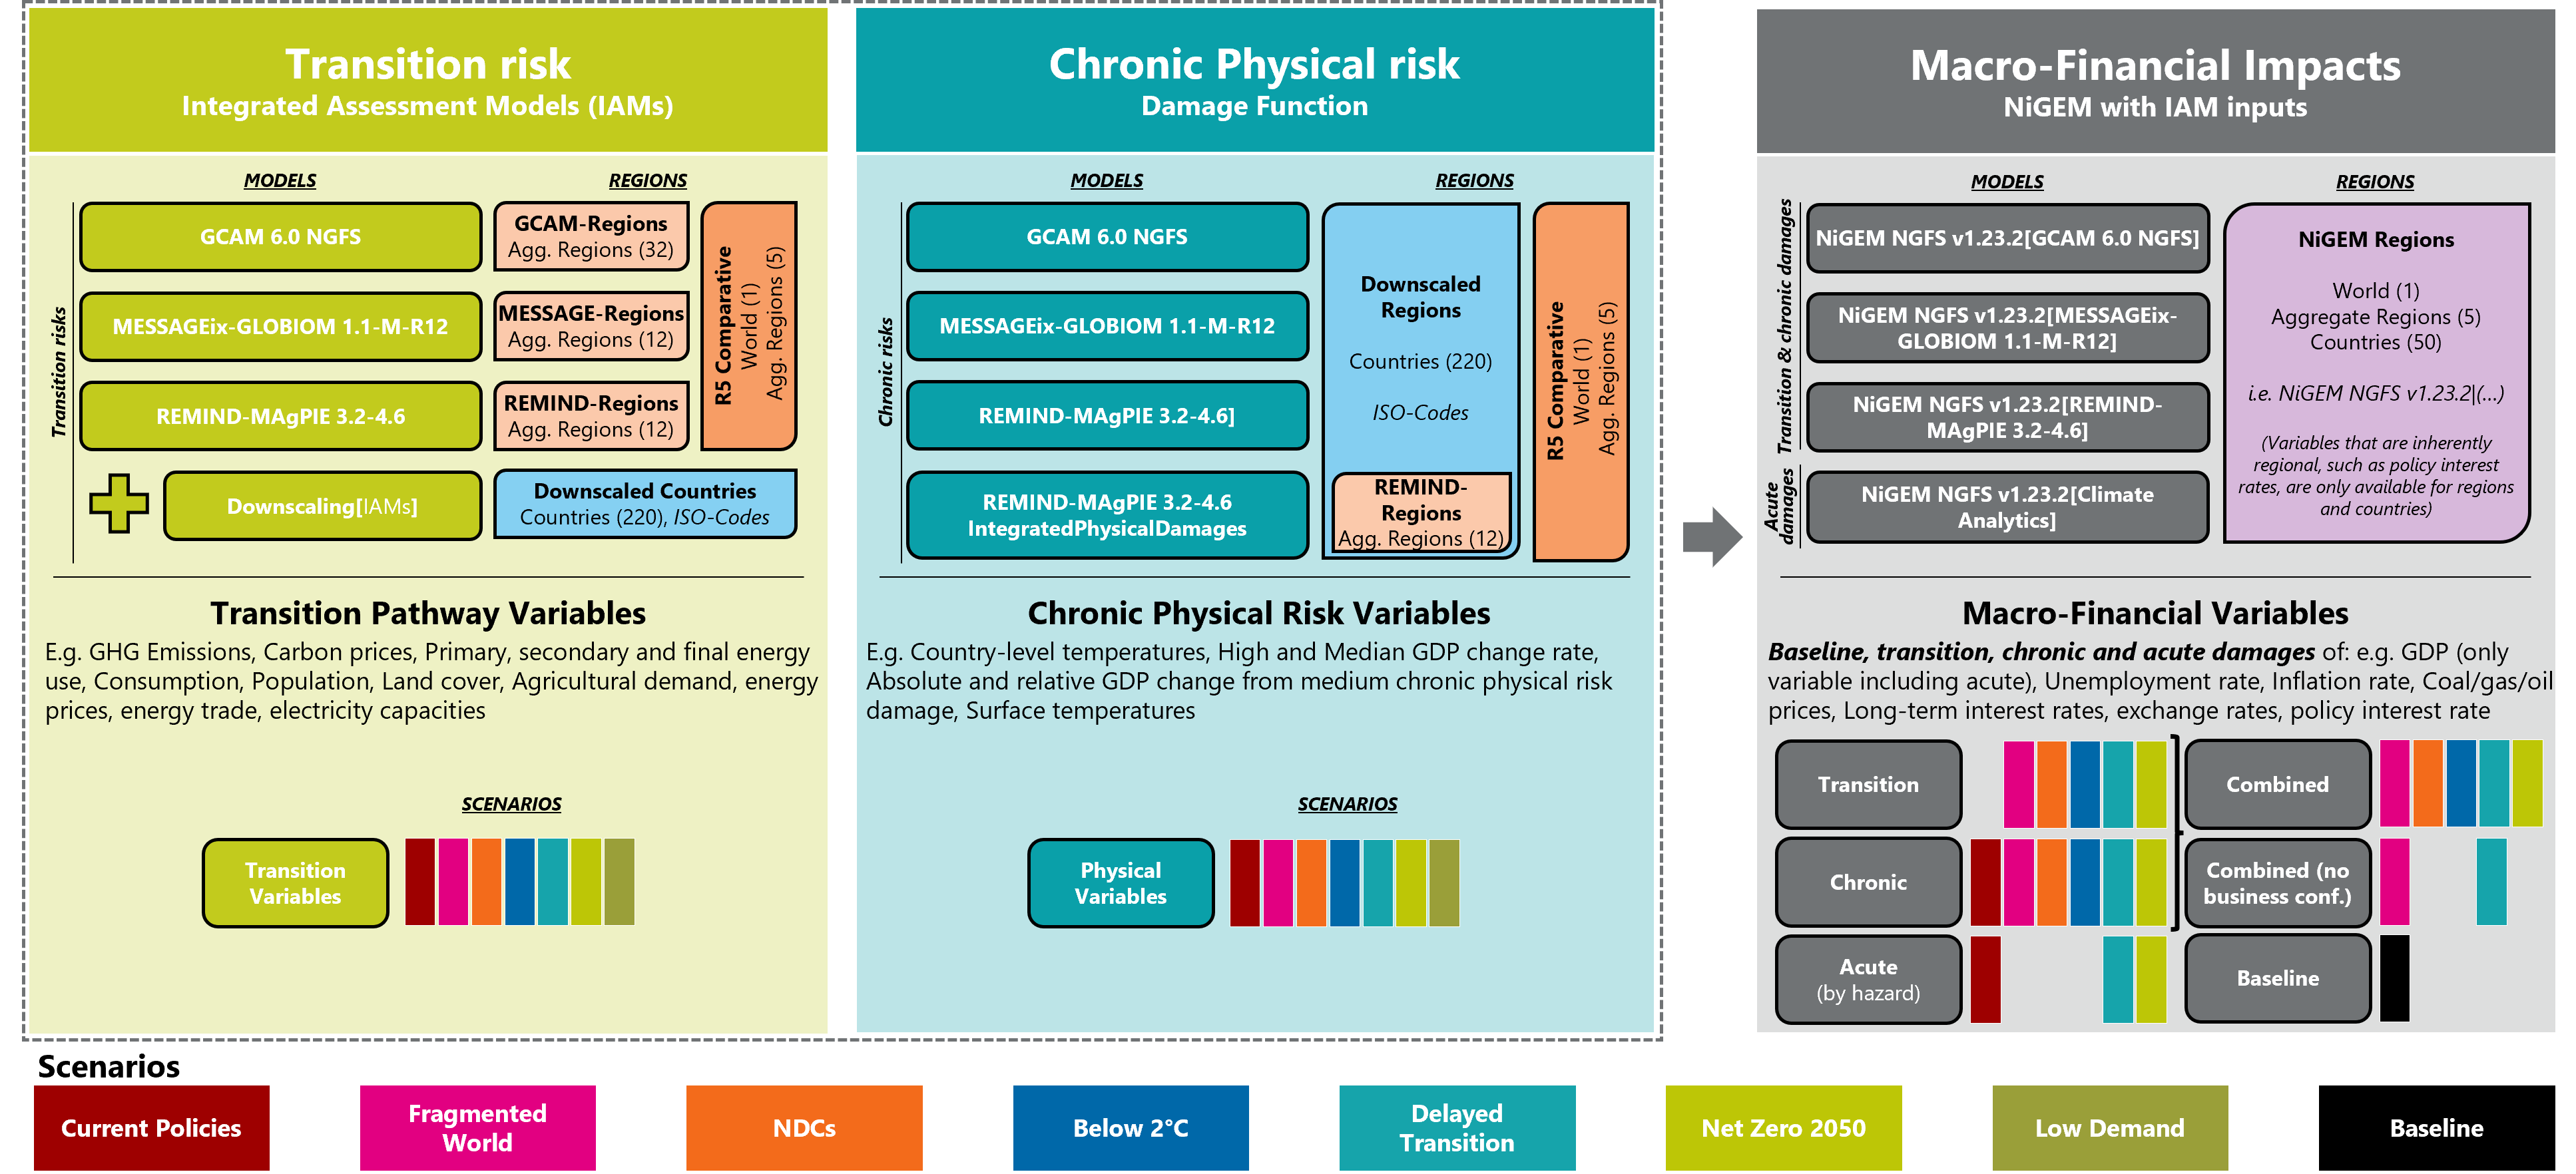

# Find parameter availabilities per phase 4 variable

### Initialisation

To start your connection, press the play button below and run the initialisation code. (The loading can take up to one minute.)

In [ ]:
!pip install ixmp4
!pip install pyam-iamc
import pyam
import ixmp4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

<IPython.core.display.Javascript object>

## Query available parameters per phase IV variable

Select a variable and start the query process. The result will give you a table that gives an overview of all available parameters for the chosen variable.

In [ ]:
# @title
################################################################################
# CREATE DROPDOWN MULTIPLE SELECTION MENUS
################################################################################

import ipywidgets as widgets
from IPython.display import display

def create_dropdown(options, value, description, rows, width):
    dropdown = widgets.SelectMultiple(
        options=options,
        value=value,
        description=description,
        rows=rows,
        layout={'width': width}
    )
    return dropdown

row_number = 10

# Dropdown widgets with multiple selection # ADD IAM VARIABLES
Variable_dropdown = create_dropdown(['Agricultural Demand', 'Agricultural Demand|Crops', 'Agricultural Demand|Crops|Energy', 'Agricultural Demand|Crops|Energy|1st generation', 'Agricultural Demand|Crops|Energy|2nd generation', 'Agricultural Demand|Crops|Feed', 'Agricultural Demand|Crops|Food', 'Agricultural Demand|Crops|Other', 'Agricultural Demand|Livestock', 'Agricultural Demand|Livestock|Food', 'Agricultural Demand|Livestock|Other', 'Agricultural Production', 'Agricultural Production|Energy', 'Agricultural Production|Energy|Crops', 'Agricultural Production|Energy|Residues', 'Agricultural Production|Non-Energy', 'Agricultural Production|Non-Energy|Crops', 'Agricultural Production|Non-Energy|Livestock', 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|CO2|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|CO2|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|CO2|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|CO2|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|N2O|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|N2O|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|N2O|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|N2O|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Atmospheric Concentrations|N2O|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Aerosols|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Aerosols|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Aerosols|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Aerosols|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Aerosols|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Anthropogenic|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Anthropogenic|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Anthropogenic|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Anthropogenic|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Anthropogenic|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Greenhouse Gases|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Greenhouse Gases|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Greenhouse Gases|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Greenhouse Gases|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Greenhouse Gases|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Anthropogenic|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Anthropogenic|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Anthropogenic|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Anthropogenic|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Anthropogenic|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|CH4|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|CH4|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|CH4|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|CH4|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|CH4|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|CO2|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|CO2|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|CO2|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|CO2|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|F-Gases|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|F-Gases|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|F-Gases|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|F-Gases|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|F-Gases|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Montreal Protocol Halogen Gases|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Montreal Protocol Halogen Gases|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Montreal Protocol Halogen Gases|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Montreal Protocol Halogen Gases|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Montreal Protocol Halogen Gases|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|N2O|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|N2O|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|N2O|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|N2O|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|N2O|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Ozone|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Ozone|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Ozone|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Ozone|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|Ozone|MAGICCv7.5.3|95.0th Percentile', 'AR6 climate diagnostics|Exceedance Probability 1.5C|MAGICCv7.5.3', 'AR6 climate diagnostics|Exceedance Probability 2.0C|MAGICCv7.5.3', 'AR6 climate diagnostics|Exceedance Probability 2.5C|MAGICCv7.5.3', 'AR6 climate diagnostics|Exceedance Probability 3.0C|MAGICCv7.5.3', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|10.0th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|16.7th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|17.0th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|25.0th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|66.0th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|75.0th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|83.0th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|83.3th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|90.0th Percentile', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|95.0th Percentile', 'Capacity Additions|Electricity|Biomass', 'Capacity Additions|Electricity|Biomass|w/ CCS', 'Capacity Additions|Electricity|Biomass|w/o CCS', 'Capacity Additions|Electricity|Coal', 'Capacity Additions|Electricity|Coal|w/ CCS', 'Capacity Additions|Electricity|Coal|w/o CCS', 'Capacity Additions|Electricity|Gas', 'Capacity Additions|Electricity|Gas|w/ CCS', 'Capacity Additions|Electricity|Gas|w/o CCS', 'Capacity Additions|Electricity|Geothermal', 'Capacity Additions|Electricity|Hydro', 'Capacity Additions|Electricity|Nuclear', 'Capacity Additions|Electricity|Oil', 'Capacity Additions|Electricity|Oil|w/ CCS', 'Capacity Additions|Electricity|Oil|w/o CCS', 'Capacity Additions|Electricity|Solar', 'Capacity Additions|Electricity|Solar|CSP', 'Capacity Additions|Electricity|Solar|PV', 'Capacity Additions|Electricity|Storage Capacity', 'Capacity Additions|Electricity|Wind', 'Capacity Additions|Electricity|Wind|Offshore', 'Capacity Additions|Electricity|Wind|Onshore', 'Capacity|Electricity', 'Capacity|Electricity|Biomass', 'Capacity|Electricity|Biomass|w/ CCS', 'Capacity|Electricity|Biomass|w/o CCS', 'Capacity|Electricity|Coal', 'Capacity|Electricity|Coal|w/ CCS', 'Capacity|Electricity|Coal|w/o CCS', 'Capacity|Electricity|Gas', 'Capacity|Electricity|Gas|w/ CCS', 'Capacity|Electricity|Gas|w/o CCS', 'Capacity|Electricity|Geothermal', 'Capacity|Electricity|Hydro', 'Capacity|Electricity|Nuclear', 'Capacity|Electricity|Oil', 'Capacity|Electricity|Oil|w/ CCS', 'Capacity|Electricity|Oil|w/o CCS', 'Capacity|Electricity|Other', 'Capacity|Electricity|Solar', 'Capacity|Electricity|Solar|CSP', 'Capacity|Electricity|Solar|PV', 'Capacity|Electricity|Storage', 'Capacity|Electricity|Wind', 'Capacity|Electricity|Wind|Offshore', 'Capacity|Electricity|Wind|Onshore', 'Capacity|Gases', 'Capacity|Gases|Biomass', 'Capacity|Gases|Biomass|w/o CCS', 'Capacity|Gases|Coal', 'Capacity|Gases|Coal|w/o CCS', 'Capacity|Hydrogen', 'Capacity|Hydrogen|Biomass', 'Capacity|Hydrogen|Biomass|w/ CCS', 'Capacity|Hydrogen|Biomass|w/o CCS', 'Capacity|Hydrogen|Coal', 'Capacity|Hydrogen|Coal|w/ CCS', 'Capacity|Hydrogen|Coal|w/o CCS', 'Capacity|Hydrogen|Electricity', 'Capacity|Hydrogen|Gas', 'Capacity|Hydrogen|Gas|w/ CCS', 'Capacity|Hydrogen|Gas|w/o CCS', 'Capacity|Liquids', 'Capacity|Liquids|Biomass', 'Capacity|Liquids|Biomass|w/ CCS', 'Capacity|Liquids|Biomass|w/o CCS', 'Capacity|Liquids|Coal', 'Capacity|Liquids|Coal|w/ CCS', 'Capacity|Liquids|Coal|w/o CCS', 'Capacity|Liquids|Gas', 'Capacity|Liquids|Gas|w/ CCS', 'Capacity|Liquids|Gas|w/o CCS', 'Capacity|Liquids|Oil', 'Capital Cost|Electricity|Biomass|w/ CCS', 'Capital Cost|Electricity|Biomass|w/o CCS', 'Capital Cost|Electricity|Coal|w/ CCS', 'Capital Cost|Electricity|Coal|w/o CCS', 'Capital Cost|Electricity|Gas|w/ CCS', 'Capital Cost|Electricity|Gas|w/o CCS', 'Capital Cost|Electricity|Geothermal', 'Capital Cost|Electricity|Hydro', 'Capital Cost|Electricity|Nuclear', 'Capital Cost|Electricity|Solar|CSP', 'Capital Cost|Electricity|Solar|PV', 'Capital Cost|Electricity|Wind|Offshore', 'Capital Cost|Electricity|Wind|Onshore', 'Capital Cost|Gases|Biomass|w/o CCS', 'Capital Cost|Gases|Coal|w/o CCS', 'Capital Cost|Hydrogen|Biomass|w/ CCS', 'Capital Cost|Hydrogen|Biomass|w/o CCS', 'Capital Cost|Hydrogen|Coal|w/ CCS', 'Capital Cost|Hydrogen|Coal|w/o CCS', 'Capital Cost|Hydrogen|Electricity', 'Capital Cost|Hydrogen|Gas|w/ CCS', 'Capital Cost|Hydrogen|Gas|w/o CCS', 'Capital Cost|Liquids|Biomass|w/ CCS', 'Capital Cost|Liquids|Biomass|w/o CCS', 'Capital Cost|Liquids|Coal|w/ CCS', 'Capital Cost|Liquids|Coal|w/o CCS', 'Capital Cost|Liquids|Gas|w/ CCS', 'Capital Cost|Liquids|Gas|w/o CCS', 'Capital Cost|Liquids|Oil', 'Carbon pricing ; $ per Tn CO2', 'Carbon pricing ; $ per Tn CO2(chronic)', 'Carbon pricing ; $ per Tn CO2(combined (no bus))', 'Carbon pricing ; $ per Tn CO2(combined)', 'Carbon pricing ; $ per Tn CO2(transition)', 'Carbon Sequestration|CCS', 'Carbon Sequestration|CCS|Biomass', 'Carbon Sequestration|CCS|Biomass|Energy|Demand|Industry', 'Carbon Sequestration|CCS|Biomass|Energy|Supply', 'Carbon Sequestration|CCS|Biomass|Energy|Supply|Electricity', 'Carbon Sequestration|CCS|Biomass|Energy|Supply|Hydrogen', 'Carbon Sequestration|CCS|Biomass|Energy|Supply|Liquids', 'Carbon Sequestration|CCS|Fossil', 'Carbon Sequestration|CCS|Fossil|Energy|Demand|Industry', 'Carbon Sequestration|CCS|Fossil|Energy|Supply', 'Carbon Sequestration|CCS|Fossil|Energy|Supply|Electricity', 'Carbon Sequestration|CCS|Fossil|Energy|Supply|Hydrogen', 'Carbon Sequestration|CCS|Fossil|Energy|Supply|Liquids', 'Carbon Sequestration|CCS|Industrial Processes', 'Carbon Sequestration|Land Use', 'Carbon Sequestration|Land Use|Afforestation', 'Central bank Intervention rate (policy interest rate) ; %', 'Central bank Intervention rate (policy interest rate) ; %(chronic)', 'Central bank Intervention rate (policy interest rate) ; %(combined (no bus))', 'Central bank Intervention rate (policy interest rate) ; %(combined)', 'Central bank Intervention rate (policy interest rate) ; %(transition)', 'Coal price ; US$ per barrel (equiv)', 'Coal price ; US$ per barrel (equiv)(chronic)', 'Coal price ; US$ per barrel (equiv)(combined (no bus))', 'Coal price ; US$ per barrel (equiv)(combined)', 'Coal price ; US$ per barrel (equiv)(transition)', 'Consumption', 'Consumption (private)', 'Consumption (private)(chronic)', 'Consumption (private)(combined (no bus))', 'Consumption (private)(combined)', 'Consumption (private)(transition)', 'Country Temperature|Downscaling|5.0th Percentile', 'Country Temperature|Downscaling|50.0th Percentile', 'Country Temperature|Downscaling|95.0th Percentile', 'Domestic demand', 'Domestic demand(chronic)', 'Domestic demand(combined (no bus))', 'Domestic demand(combined)', 'Domestic demand(transition)', 'Effective exchange rate', 'Effective exchange rate(chronic)', 'Effective exchange rate(combined (no bus))', 'Effective exchange rate(combined)', 'Effective exchange rate(transition)', 'Emissions|BC', 'Emissions|BC|AFOLU', 'Emissions|BC|Energy', 'Emissions|BC|Energy|Demand|Industry', 'Emissions|BC|Energy|Demand|Residential and Commercial', 'Emissions|BC|Energy|Demand|Transportation', 'Emissions|BC|Energy|Supply', 'Emissions|C2F6', 'Emissions|C6F14', 'Emissions|CF4', 'Emissions|CH4', 'Emissions|CH4|AFOLU', 'Emissions|CH4|Energy', 'Emissions|CH4|Energy|Demand|Industry', 'Emissions|CH4|Energy|Demand|Residential and Commercial', 'Emissions|CH4|Energy|Demand|Transportation', 'Emissions|CH4|Energy|Supply', 'Emissions|CH4|Other', 'Emissions|CO', 'Emissions|CO|AFOLU', 'Emissions|CO|Energy', 'Emissions|CO|Energy|Demand|Industry', 'Emissions|CO|Energy|Demand|Residential and Commercial', 'Emissions|CO|Energy|Demand|Transportation', 'Emissions|CO|Energy|Supply', 'Emissions|CO2', 'Emissions|CO2|AFOLU', 'Emissions|CO2|Energy', 'Emissions|CO2|Energy and Industrial Processes', 'Emissions|CO2|Energy|Demand', 'Emissions|CO2|Energy|Demand|AFOFI', 'Emissions|CO2|Energy|Demand|Industry', 'Emissions|CO2|Energy|Demand|Industry|Cement', 'Emissions|CO2|Energy|Demand|Industry|Chemicals', 'Emissions|CO2|Energy|Demand|Industry|Chemicals|Ammonia', 'Emissions|CO2|Energy|Demand|Industry|Chemicals|High value chemicals', 'Emissions|CO2|Energy|Demand|Industry|Non-ferrous metals', 'Emissions|CO2|Energy|Demand|Industry|Other', 'Emissions|CO2|Energy|Demand|Industry|Steel', 'Emissions|CO2|Energy|Demand|Residential and Commercial', 'Emissions|CO2|Energy|Demand|Residential and Commercial|Commercial', 'Emissions|CO2|Energy|Demand|Residential and Commercial|Residential', 'Emissions|CO2|Energy|Demand|Transportation', 'Emissions|CO2|Energy|Demand|Transportation|Aviation', 'Emissions|CO2|Energy|Demand|Transportation|Aviation|Passenger', 'Emissions|CO2|Energy|Demand|Transportation|Freight', 'Emissions|CO2|Energy|Demand|Transportation|Maritime|Freight', 'Emissions|CO2|Energy|Demand|Transportation|Passenger', 'Emissions|CO2|Energy|Demand|Transportation|Rail', 'Emissions|CO2|Energy|Demand|Transportation|Rail|Freight', 'Emissions|CO2|Energy|Demand|Transportation|Rail|Passenger', 'Emissions|CO2|Energy|Demand|Transportation|Road', 'Emissions|CO2|Energy|Demand|Transportation|Road|Freight', 'Emissions|CO2|Energy|Demand|Transportation|Road|Passenger', 'Emissions|CO2|Energy|Demand|Transportation|Road|Passenger|Bus', 'Emissions|CO2|Energy|Demand|Transportation|Road|Passenger|LDV', 'Emissions|CO2|Energy|Supply', 'Emissions|CO2|Energy|Supply|Electricity', 'Emissions|CO2|Energy|Supply|Gases', 'Emissions|CO2|Energy|Supply|Heat', 'Emissions|CO2|Energy|Supply|Liquids', 'Emissions|CO2|Energy|Supply|Other Sector', 'Emissions|CO2|Energy|Supply|Solids', 'Emissions|CO2|Industrial Processes', 'Emissions|CO2|LULUCF Direct+Indirect', 'Emissions|CO2|LULUCF Indirect', 'Emissions|F-Gases', 'Emissions|HFC', 'Emissions|HFC|HFC125', 'Emissions|HFC|HFC134a', 'Emissions|HFC|HFC143a', 'Emissions|HFC|HFC227ea', 'Emissions|HFC|HFC23', 'Emissions|HFC|HFC245fa', 'Emissions|HFC|HFC32', 'Emissions|HFC|HFC43-10', 'Emissions|Kyoto Gases', 'Emissions|Kyoto Gases (incl. indirect LULUCF)', 'Emissions|Kyoto Gases|AFOLU', 'Emissions|Kyoto Gases|Cement', 'Emissions|Kyoto Gases|Chemicals', 'Emissions|Kyoto Gases|Electricity', 'Emissions|Kyoto Gases|Industry', 'Emissions|Kyoto Gases|Other', 'Emissions|Kyoto Gases|Other Energy Supply', 'Emissions|Kyoto Gases|Other Industry', 'Emissions|Kyoto Gases|Residential and Commercial', 'Emissions|Kyoto Gases|Steel', 'Emissions|Kyoto Gases|Supply', 'Emissions|Kyoto Gases|Transportation', 'Emissions|N2O', 'Emissions|N2O|AFOLU', 'Emissions|N2O|Energy', 'Emissions|N2O|Other', 'Emissions|NH3', 'Emissions|NH3|AFOLU', 'Emissions|NH3|Energy', 'Emissions|NH3|Energy|Demand|Industry', 'Emissions|NH3|Energy|Demand|Residential and Commercial', 'Emissions|NH3|Energy|Demand|Transportation', 'Emissions|NH3|Energy|Supply', 'Emissions|NH3|Other', 'Emissions|NH3|Waste', 'Emissions|NOx', 'Emissions|NOx|AFOLU', 'Emissions|NOx|Energy', 'Emissions|NOx|Energy|Demand|Industry', 'Emissions|NOx|Energy|Demand|Residential and Commercial', 'Emissions|NOx|Energy|Demand|Transportation', 'Emissions|NOx|Energy|Supply', 'Emissions|NOx|Other', 'Emissions|NOx|Waste', 'Emissions|OC', 'Emissions|OC|AFOLU', 'Emissions|OC|Energy', 'Emissions|OC|Energy|Demand|Industry', 'Emissions|OC|Energy|Demand|Residential and Commercial', 'Emissions|OC|Energy|Demand|Transportation', 'Emissions|OC|Energy|Supply', 'Emissions|OC|Other', 'Emissions|OC|Waste', 'Emissions|PFC', 'Emissions|SF6', 'Emissions|Sulfur', 'Emissions|Sulfur|AFOLU', 'Emissions|Sulfur|Energy', 'Emissions|Sulfur|Energy|Demand|Industry', 'Emissions|Sulfur|Energy|Demand|Residential and Commercial', 'Emissions|Sulfur|Energy|Demand|Transportation', 'Emissions|Sulfur|Energy|Supply', 'Emissions|Sulfur|Other', 'Emissions|Sulfur|Waste', 'Emissions|Total Non-CO2', 'Emissions|VOC', 'Emissions|VOC|AFOLU', 'Emissions|VOC|Energy', 'Emissions|VOC|Energy|Demand|Industry', 'Emissions|VOC|Energy|Demand|Residential and Commercial', 'Emissions|VOC|Energy|Demand|Transportation', 'Emissions|VOC|Energy|Supply', 'Emissions|VOC|Other', 'Emissions|VOC|Waste', 'Energy consumption (total) ; MnToe', 'Energy consumption (total) ; MnToe(chronic)', 'Energy consumption (total) ; MnToe(combined (no bus))', 'Energy consumption (total) ; MnToe(combined)', 'Energy consumption (total) ; MnToe(transition)', 'Energy Service|Residential and Commercial|Floor Space', 'Energy Service|Residential and Commercial|Residential|Floor Space', 'Energy Service|Transportation|Aviation', 'Energy Service|Transportation|Freight', 'Energy Service|Transportation|Freight|International Shipping', 'Energy Service|Transportation|Freight|Navigation', 'Energy Service|Transportation|Freight|Railways', 'Energy Service|Transportation|Freight|Road', 'Energy Service|Transportation|Navigation', 'Energy Service|Transportation|Passenger', 'Energy Service|Transportation|Passenger|Aviation', 'Energy Service|Transportation|Passenger|Bicycling and Walking', 'Energy Service|Transportation|Passenger|Railways', 'Energy Service|Transportation|Passenger|Road', 'Energy Service|Transportation|Passenger|Road|Bus', 'Energy Service|Transportation|Passenger|Road|LDV', 'Energy Service|Transportation|Rail', 'Energy Service|Transportation|Road', 'Equity prices', 'Equity prices(chronic)', 'Equity prices(combined (no bus))', 'Equity prices(combined)', 'Equity prices(transition)', 'Exchange rate ; domestic per US$', 'Exchange rate ; domestic per US$(chronic)', 'Exchange rate ; domestic per US$(combined (no bus))', 'Exchange rate ; domestic per US$(combined)', 'Exchange rate ; domestic per US$(transition)', 'Exchange rate ; per US$', 'Exchange rate ; per US$(chronic)', 'Exchange rate ; per US$(combined (no bus))', 'Exchange rate ; per US$(combined)', 'Exchange rate ; per US$(transition)', 'Exchange rate; local per US$', 'Exchange rate; local per US$(chronic)', 'Exchange rate; local per US$(combined (no bus))', 'Exchange rate; local per US$(combined)', 'Exchange rate; local per US$(transition)', 'Exports (goods and services excl. MTIC)', 'Exports (goods and services excl. MTIC)(chronic)', 'Exports (goods and services excl. MTIC)(combined (no bus))', 'Exports (goods and services excl. MTIC)(combined)', 'Exports (goods and services excl. MTIC)(transition)', 'Exports (goods and services)', 'Exports (goods and services)(chronic)', 'Exports (goods and services)(combined (no bus))', 'Exports (goods and services)(combined)', 'Exports (goods and services)(transition)', 'Fertilizer Use|Nitrogen', 'Fertilizer Use|Phosphorus', 'Final Energy', 'Final Energy|Electricity', 'Final Energy|Gases', 'Final Energy|Geothermal', 'Final Energy|Heat', 'Final Energy|Hydrogen', 'Final Energy|Industry', 'Final Energy|Industry|Cement', 'Final Energy|Industry|Cement|Electricity', 'Final Energy|Industry|Cement|Gases', 'Final Energy|Industry|Cement|Heat', 'Final Energy|Industry|Cement|Hydrogen', 'Final Energy|Industry|Cement|Liquids', 'Final Energy|Industry|Cement|Solids', 'Final Energy|Industry|Chemicals', 'Final Energy|Industry|Chemicals|Ammonia', 'Final Energy|Industry|Chemicals|Ammonia|Gases', 'Final Energy|Industry|Chemicals|Ammonia|Hydrogen', 'Final Energy|Industry|Chemicals|Ammonia|Liquids', 'Final Energy|Industry|Chemicals|Ammonia|Solids', 'Final Energy|Industry|Chemicals|Ammonia|Solids|Fossil', 'Final Energy|Industry|Chemicals|Electricity', 'Final Energy|Industry|Chemicals|Gases', 'Final Energy|Industry|Chemicals|Heat', 'Final Energy|Industry|Chemicals|High value chemicals', 'Final Energy|Industry|Chemicals|High value chemicals|Electricity', 'Final Energy|Industry|Chemicals|High value chemicals|Gases', 'Final Energy|Industry|Chemicals|High value chemicals|Heat', 'Final Energy|Industry|Chemicals|High value chemicals|Hydrogen', 'Final Energy|Industry|Chemicals|High value chemicals|Liquids', 'Final Energy|Industry|Chemicals|High value chemicals|Solids', 'Final Energy|Industry|Chemicals|Hydrogen', 'Final Energy|Industry|Chemicals|Liquids', 'Final Energy|Industry|Chemicals|Solids', 'Final Energy|Industry|Chemicals|Solids|Bioenergy', 'Final Energy|Industry|Chemicals|Solids|Fossil', 'Final Energy|Industry|Electricity', 'Final Energy|Industry|Electricity|Share', 'Final Energy|Industry|Gases', 'Final Energy|Industry|Gases|Bioenergy', 'Final Energy|Industry|Heat', 'Final Energy|Industry|Hydrogen', 'Final Energy|Industry|Liquids', 'Final Energy|Industry|Liquids|Biomass', 'Final Energy|Industry|Liquids|Coal', 'Final Energy|Industry|Liquids|Oil', 'Final Energy|Industry|Non-ferrous metals', 'Final Energy|Industry|Non-ferrous metals|Electricity', 'Final Energy|Industry|Non-ferrous metals|Gases', 'Final Energy|Industry|Non-ferrous metals|Heat', 'Final Energy|Industry|Non-ferrous metals|Hydrogen', 'Final Energy|Industry|Non-ferrous metals|Liquids', 'Final Energy|Industry|Non-ferrous metals|Solids', 'Final Energy|Industry|Non-ferrous metals|Solids|Bioenergy', 'Final Energy|Industry|Non-ferrous metals|Solids|Fossil', 'Final Energy|Industry|Other', 'Final Energy|Industry|Other|Electricity', 'Final Energy|Industry|Other|Gases', 'Final Energy|Industry|Other|Heat', 'Final Energy|Industry|Other|Hydrogen', 'Final Energy|Industry|Other|Liquids', 'Final Energy|Industry|Other|Solids', 'Final Energy|Industry|Solids', 'Final Energy|Industry|Solids|Biomass', 'Final Energy|Industry|Solids|Coal', 'Final Energy|Industry|Steel', 'Final Energy|Industry|Steel|Electricity', 'Final Energy|Industry|Steel|Gases', 'Final Energy|Industry|Steel|Heat', 'Final Energy|Industry|Steel|Hydrogen', 'Final Energy|Industry|Steel|Liquids', 'Final Energy|Industry|Steel|Solids', 'Final Energy|Industry|Steel|Solids|Bioenergy', 'Final Energy|Industry|Steel|Solids|Fossil', 'Final Energy|Liquids', 'Final Energy|Non-Energy Use', 'Final Energy|Non-Energy Use|Biomass', 'Final Energy|Non-Energy Use|Coal', 'Final Energy|Non-Energy Use|Gas', 'Final Energy|Non-Energy Use|Oil', 'Final Energy|Other Sector', 'Final Energy|Other Sector|Electricity', 'Final Energy|Other Sector|Gases', 'Final Energy|Other Sector|Heat', 'Final Energy|Other Sector|Hydrogen', 'Final Energy|Other Sector|Liquids', 'Final Energy|Residential and Commercial', 'Final Energy|Residential and Commercial|Commercial|Cooling', 'Final Energy|Residential and Commercial|Commercial|Electricity', 'Final Energy|Residential and Commercial|Commercial|Gases', 'Final Energy|Residential and Commercial|Commercial|Heat', 'Final Energy|Residential and Commercial|Commercial|Heating|Space', 'Final Energy|Residential and Commercial|Commercial|Hydrogen', 'Final Energy|Residential and Commercial|Commercial|Liquids', 'Final Energy|Residential and Commercial|Commercial|Solids', 'Final Energy|Residential and Commercial|Commercial|Solids|Biomass', 'Final Energy|Residential and Commercial|Commercial|Solids|Coal', 'Final Energy|Residential and Commercial|Cooling', 'Final Energy|Residential and Commercial|Electricity', 'Final Energy|Residential and Commercial|Gases', 'Final Energy|Residential and Commercial|Gases|Biomass', 'Final Energy|Residential and Commercial|Gases|Natural Gas', 'Final Energy|Residential and Commercial|Heat', 'Final Energy|Residential and Commercial|Heating', 'Final Energy|Residential and Commercial|Heating|Space', 'Final Energy|Residential and Commercial|Hydrogen', 'Final Energy|Residential and Commercial|Liquids', 'Final Energy|Residential and Commercial|Liquids|Biomass', 'Final Energy|Residential and Commercial|Liquids|Coal', 'Final Energy|Residential and Commercial|Liquids|Oil', 'Final Energy|Residential and Commercial|Other', 'Final Energy|Residential and Commercial|Residential|Cooling', 'Final Energy|Residential and Commercial|Residential|Electricity', 'Final Energy|Residential and Commercial|Residential|Gases', 'Final Energy|Residential and Commercial|Residential|Heat', 'Final Energy|Residential and Commercial|Residential|Heating|Space', 'Final Energy|Residential and Commercial|Residential|Hydrogen', 'Final Energy|Residential and Commercial|Residential|Liquids', 'Final Energy|Residential and Commercial|Solids', 'Final Energy|Residential and Commercial|Solids|Biomass', 'Final Energy|Residential and Commercial|Solids|Biomass|Traditional', 'Final Energy|Residential and Commercial|Solids|Coal', 'Final Energy|Solar', 'Final Energy|Solids', 'Final Energy|Solids|Biomass', 'Final Energy|Solids|Biomass|Traditional', 'Final Energy|Solids|Coal', 'Final Energy|Transportation', 'Final Energy|Transportation|Aviation', 'Final Energy|Transportation|Aviation|Passenger', 'Final Energy|Transportation|Electricity', 'Final Energy|Transportation|Freight', 'Final Energy|Transportation|Freight|Electricity', 'Final Energy|Transportation|Freight|Gases', 'Final Energy|Transportation|Freight|Hydrogen', 'Final Energy|Transportation|Freight|Liquids', 'Final Energy|Transportation|Freight|Other', 'Final Energy|Transportation|Gases', 'Final Energy|Transportation|Gases|Bioenergy', 'Final Energy|Transportation|Gases|Fossil', 'Final Energy|Transportation|Hydrogen', 'Final Energy|Transportation|Liquids', 'Final Energy|Transportation|Liquids|Bioenergy', 'Final Energy|Transportation|Liquids|Coal', 'Final Energy|Transportation|Liquids|Natural Gas', 'Final Energy|Transportation|Liquids|Oil', 'Final Energy|Transportation|Maritime', 'Final Energy|Transportation|Maritime|Freight', 'Final Energy|Transportation|Other', 'Final Energy|Transportation|Passenger', 'Final Energy|Transportation|Passenger|Electricity', 'Final Energy|Transportation|Passenger|Gases', 'Final Energy|Transportation|Passenger|Hydrogen', 'Final Energy|Transportation|Passenger|Liquids', 'Final Energy|Transportation|Rail', 'Final Energy|Transportation|Rail|Freight', 'Final Energy|Transportation|Rail|Passenger', 'Final Energy|Transportation|Road|Freight', 'Final Energy|Transportation|Road|Freight|Electric', 'Final Energy|Transportation|Road|Freight|FC', 'Final Energy|Transportation|Road|Freight|ICE', 'Final Energy|Transportation|Road|Passenger', 'Final Energy|Transportation|Road|Passenger|2W&3W', 'Final Energy|Transportation|Road|Passenger|Bus', 'Final Energy|Transportation|Road|Passenger|LDV', 'Food Demand', 'Food Demand|Crops', 'Food Demand|Livestock', 'Forcing', 'Forcing|Kyoto Gases', 'Forestry Demand|Roundwood', 'Forestry Demand|Roundwood|Industrial Roundwood', 'Forestry Demand|Roundwood|Wood Fuel', 'Forestry Production|Roundwood', 'Forestry Production|Roundwood|Industrial Roundwood', 'Forestry Production|Roundwood|Wood Fuel', 'Gas price ; US$ per barrel (equiv)', 'Gas price ; US$ per barrel (equiv)(chronic)', 'Gas price ; US$ per barrel (equiv)(combined (no bus))', 'Gas price ; US$ per barrel (equiv)(combined)', 'Gas price ; US$ per barrel (equiv)(transition)', 'GDP|MER|Counterfactual without damage', 'GDP|MER|including high chronic physical risk damage estimate', 'GDP|MER|including medium chronic physical risk damage estimate', 'GDP|PPP|Counterfactual without damage', 'GDP|PPP|including high chronic physical risk damage estimate', 'GDP|PPP|including medium chronic physical risk damage estimate', 'Gov. consumption', 'Gov. consumption(chronic)', 'Gov. consumption(combined (no bus))', 'Gov. consumption(combined)', 'Gov. consumption(transition)', 'Gross domestic income; local currency', 'Gross domestic income; local currency(chronic)', 'Gross domestic income; local currency(combined (no bus))', 'Gross domestic income; local currency(combined)', 'Gross domestic income; local currency(transition)', 'Gross Domestic Product (GDP)', 'Gross Domestic Product (GDP)(chronic)', 'Gross Domestic Product (GDP)(combined (no bus))', 'Gross Domestic Product (GDP)(combined)', 'Gross Domestic Product (GDP)(cyclone-60)', 'Gross Domestic Product (GDP)(cyclone-65)', 'Gross Domestic Product (GDP)(cyclone-70)', 'Gross Domestic Product (GDP)(cyclone-75)', 'Gross Domestic Product (GDP)(cyclone-80)', 'Gross Domestic Product (GDP)(cyclone-85)', 'Gross Domestic Product (GDP)(cyclone-90)', 'Gross Domestic Product (GDP)(cyclone-95)', 'Gross Domestic Product (GDP)(cyclone-99)', 'Gross Domestic Product (GDP)(drought-60)', 'Gross Domestic Product (GDP)(drought-65)', 'Gross Domestic Product (GDP)(drought-70)', 'Gross Domestic Product (GDP)(drought-75)', 'Gross Domestic Product (GDP)(drought-80)', 'Gross Domestic Product (GDP)(drought-85)', 'Gross Domestic Product (GDP)(drought-90)', 'Gross Domestic Product (GDP)(drought-95)', 'Gross Domestic Product (GDP)(drought-99)', 'Gross Domestic Product (GDP)(flood)', 'Gross Domestic Product (GDP)(heatwave-60)', 'Gross Domestic Product (GDP)(heatwave-65)', 'Gross Domestic Product (GDP)(heatwave-70)', 'Gross Domestic Product (GDP)(heatwave-75)', 'Gross Domestic Product (GDP)(heatwave-80)', 'Gross Domestic Product (GDP)(heatwave-85)', 'Gross Domestic Product (GDP)(heatwave-90)', 'Gross Domestic Product (GDP)(heatwave-95)', 'Gross Domestic Product (GDP)(heatwave-99)', 'Gross Domestic Product (GDP)(transition)', 'Gross operating surplus', 'Gross operating surplus(chronic)', 'Gross operating surplus(combined (no bus))', 'Gross operating surplus(combined)', 'Gross operating surplus(transition)', 'House prices (residential)', 'House prices (residential)(chronic)', 'House prices (residential)(combined (no bus))', 'House prices (residential)(combined)', 'House prices (residential)(transition)', 'IMF Emerging and developing Asia GDP', 'IMF Emerging and developing Asia GDP(chronic)', 'IMF Emerging and developing Asia GDP(combined (no bus))', 'IMF Emerging and developing Asia GDP(combined)', 'IMF Emerging and developing Asia GDP(transition)', 'IMF Emerging and developing Asia Inflation rate ; %', 'IMF Emerging and developing Asia Inflation rate ; %(chronic)', 'IMF Emerging and developing Asia Inflation rate ; %(combined (no bus))', 'IMF Emerging and developing Asia Inflation rate ; %(combined)', 'IMF Emerging and developing Asia Inflation rate ; %(transition)', 'IMF Emerging and developing Europe GDP', 'IMF Emerging and developing Europe GDP(chronic)', 'IMF Emerging and developing Europe GDP(combined (no bus))', 'IMF Emerging and developing Europe GDP(combined)', 'IMF Emerging and developing Europe GDP(transition)', 'IMF Emerging and developing Europe Inflation rate ; %', 'IMF Emerging and developing Europe Inflation rate ; %(chronic)', 'IMF Emerging and developing Europe Inflation rate ; %(combined (no bus))', 'IMF Emerging and developing Europe Inflation rate ; %(combined)', 'IMF Emerging and developing Europe Inflation rate ; %(transition)', 'IMF Latin America and the Caribbean GDP', 'IMF Latin America and the Caribbean GDP(chronic)', 'IMF Latin America and the Caribbean GDP(combined (no bus))', 'IMF Latin America and the Caribbean GDP(combined)', 'IMF Latin America and the Caribbean GDP(transition)', 'IMF Latin America and the Caribbean Inflation rate ; %', 'IMF Latin America and the Caribbean Inflation rate ; %(chronic)', 'IMF Latin America and the Caribbean Inflation rate ; %(combined (no bus))', 'IMF Latin America and the Caribbean Inflation rate ; %(combined)', 'IMF Latin America and the Caribbean Inflation rate ; %(transition)', 'IMF Middle East and Central Asia GDP', 'IMF Middle East and Central Asia GDP(chronic)', 'IMF Middle East and Central Asia GDP(combined (no bus))', 'IMF Middle East and Central Asia GDP(combined)', 'IMF Middle East and Central Asia GDP(transition)', 'IMF Middle East and Central Asia Inflation rate ; %', 'IMF Middle East and Central Asia Inflation rate ; %(chronic)', 'IMF Middle East and Central Asia Inflation rate ; %(combined (no bus))', 'IMF Middle East and Central Asia Inflation rate ; %(combined)', 'IMF Middle East and Central Asia Inflation rate ; %(transition)', 'IMF Sub-Saharan Africa GDP', 'IMF Sub-Saharan Africa GDP(chronic)', 'IMF Sub-Saharan Africa GDP(combined (no bus))', 'IMF Sub-Saharan Africa GDP(combined)', 'IMF Sub-Saharan Africa GDP(transition)', 'IMF Sub-Saharan Africa Inflation rate ; %', 'IMF Sub-Saharan Africa Inflation rate ; %(chronic)', 'IMF Sub-Saharan Africa Inflation rate ; %(combined (no bus))', 'IMF Sub-Saharan Africa Inflation rate ; %(combined)', 'IMF Sub-Saharan Africa Inflation rate ; %(transition)', 'Imports (goods and services excl MTIC)', 'Imports (goods and services excl MTIC)(chronic)', 'Imports (goods and services excl MTIC)(combined (no bus))', 'Imports (goods and services excl MTIC)(combined)', 'Imports (goods and services excl MTIC)(transition)', 'Imports (goods and services)', 'Imports (goods and services)(chronic)', 'Imports (goods and services)(combined (no bus))', 'Imports (goods and services)(combined)', 'Imports (goods and services)(transition)', 'Inflation rate ; %', 'Inflation rate ; %(chronic)', 'Inflation rate ; %(combined (no bus))', 'Inflation rate ; %(combined)', 'Inflation rate ; %(transition)', 'Investment', 'Investment (gov.)', 'Investment (gov.)(chronic)', 'Investment (gov.)(combined (no bus))', 'Investment (gov.)(combined)', 'Investment (gov.)(transition)', 'Investment (private sector)', 'Investment (private sector)(chronic)', 'Investment (private sector)(combined (no bus))', 'Investment (private sector)(combined)', 'Investment (private sector)(transition)', 'Investment|Energy Supply', 'Investment|Energy Supply|CO2 Transport and Storage', 'Investment|Energy Supply|Electricity', 'Investment|Energy Supply|Electricity|Biomass', 'Investment|Energy Supply|Electricity|Biomass|w/ CCS', 'Investment|Energy Supply|Electricity|Biomass|w/o CCS', 'Investment|Energy Supply|Electricity|Coal', 'Investment|Energy Supply|Electricity|Coal|w/ CCS', 'Investment|Energy Supply|Electricity|Coal|w/o CCS', 'Investment|Energy Supply|Electricity|Electricity Storage', 'Investment|Energy Supply|Electricity|Fossil', 'Investment|Energy Supply|Electricity|Gas', 'Investment|Energy Supply|Electricity|Gas|w/ CCS', 'Investment|Energy Supply|Electricity|Gas|w/o CCS', 'Investment|Energy Supply|Electricity|Geothermal', 'Investment|Energy Supply|Electricity|Hydro', 'Investment|Energy Supply|Electricity|Non-Biomass Renewables', 'Investment|Energy Supply|Electricity|Non-fossil', 'Investment|Energy Supply|Electricity|Nuclear', 'Investment|Energy Supply|Electricity|Oil', 'Investment|Energy Supply|Electricity|Oil|w/ CCS', 'Investment|Energy Supply|Electricity|Oil|w/o CCS', 'Investment|Energy Supply|Electricity|Other', 'Investment|Energy Supply|Electricity|Solar', 'Investment|Energy Supply|Electricity|Transmission and Distribution', 'Investment|Energy Supply|Electricity|Wind', 'Investment|Energy Supply|Extraction|Coal', 'Investment|Energy Supply|Extraction|Fossil', 'Investment|Energy Supply|Extraction|Gas', 'Investment|Energy Supply|Extraction|Oil', 'Investment|Energy Supply|Extraction|Uranium', 'Investment|Energy Supply|Heat', 'Investment|Energy Supply|Hydrogen', 'Investment|Energy Supply|Hydrogen|Biomass', 'Investment|Energy Supply|Hydrogen|Electricity', 'Investment|Energy Supply|Hydrogen|Fossil', 'Investment|Energy Supply|Hydrogen|Other', 'Investment|Energy Supply|Hydrogen|Renewable', 'Investment|Energy Supply|Liquids', 'Investment|Energy Supply|Liquids|Biomass', 'Investment|Energy Supply|Liquids|Coal and Gas', 'Investment|Energy Supply|Liquids|Oil', 'Investment|Energy Supply|Other', 'Land Cover', 'Land Cover|Built-up Area', 'Land Cover|Cropland', 'Land Cover|Cropland|Cereals', 'Land Cover|Cropland|Energy Crops', 'Land Cover|Cropland|Irrigated', 'Land Cover|Forest', 'Land Cover|Forest|Afforestation and Reforestation', 'Land Cover|Forest|Managed', 'Land Cover|Forest|Natural Forest', 'Land Cover|Forest|Secondary', 'Land Cover|Other Land', 'Land Cover|Pasture', 'Long term interest rate ; %', 'Long term interest rate ; %(chronic)', 'Long term interest rate ; %(combined (no bus))', 'Long term interest rate ; %(combined)', 'Long term interest rate ; %(transition)', 'Long term real interest rate ; %', 'Long term real interest rate ; %(chronic)', 'Long term real interest rate ; %(combined (no bus))', 'Long term real interest rate ; %(combined)', 'Long term real interest rate ; %(transition)', 'Net GDP|PPP|high damage|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|5.0th Percentile', 'Net GDP|PPP|high damage|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|50.0th Percentile', 'Net GDP|PPP|high damage|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|95.0th Percentile', 'Net GDP|PPP|median damage|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|5.0th Percentile', 'Net GDP|PPP|median damage|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|50.0th Percentile', 'Net GDP|PPP|median damage|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|95.0th Percentile', 'Oil price ; US$ per barrel', 'Oil price ; US$ per barrel(chronic)', 'Oil price ; US$ per barrel(combined (no bus))', 'Oil price ; US$ per barrel(combined)', 'Oil price ; US$ per barrel(transition)', 'Policy Cost|Additional Total Energy System Cost', 'Policy Cost|Consumption Loss', 'Policy Cost|GDP Loss', 'Population', 'Population|Rural', 'Population|Urban', 'Post-processed|absolute GDP change from high chronic physical risk damage estimate', 'Post-processed|absolute GDP change from integrating high chronic physical risk damage estimate', 'Post-processed|absolute GDP change from integrating medium chronic physical risk damage estimate', 'Post-processed|absolute GDP change from medium chronic physical risk damage estimate', 'Post-processed|high GDP change|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|5.0th Percentile', 'Post-processed|high GDP change|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|50.0th Percentile', 'Post-processed|high GDP change|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|95.0th Percentile', 'Post-processed|Investment|Energy Efficiency', 'Post-processed|Investment|Energy Efficiency|Average 2016-2030', 'Post-processed|Investment|Energy Efficiency|Average 2016-2050', 'Post-processed|Investment|Energy Supply', 'Post-processed|Investment|Energy Supply|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Biomass', 'Post-processed|Investment|Energy Supply|Biomass|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Biomass|Average 2016-2050', 'Post-processed|Investment|Energy Supply|CCS', 'Post-processed|Investment|Energy Supply|CCS|Average 2016-2030', 'Post-processed|Investment|Energy Supply|CCS|Average 2016-2050', 'Post-processed|Investment|Energy Supply|CO2 Transport and Storage', 'Post-processed|Investment|Energy Supply|CO2 Transport and Storage|Average 2016-2030', 'Post-processed|Investment|Energy Supply|CO2 Transport and Storage|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity', 'Post-processed|Investment|Energy Supply|Electricity|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Biomass', 'Post-processed|Investment|Energy Supply|Electricity|Biomass|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Biomass|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Biomass|w/ CCS', 'Post-processed|Investment|Energy Supply|Electricity|Biomass|w/ CCS|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Biomass|w/ CCS|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Biomass|w/o CCS', 'Post-processed|Investment|Energy Supply|Electricity|Biomass|w/o CCS|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Biomass|w/o CCS|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Coal', 'Post-processed|Investment|Energy Supply|Electricity|Coal|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Coal|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Coal|w/ CCS', 'Post-processed|Investment|Energy Supply|Electricity|Coal|w/ CCS|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Coal|w/ CCS|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Coal|w/o CCS', 'Post-processed|Investment|Energy Supply|Electricity|Coal|w/o CCS|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Coal|w/o CCS|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Electricity Storage', 'Post-processed|Investment|Energy Supply|Electricity|Electricity Storage|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Electricity Storage|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Fossil', 'Post-processed|Investment|Energy Supply|Electricity|Fossil w/o CCS', 'Post-processed|Investment|Energy Supply|Electricity|Fossil w/o CCS|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Fossil w/o CCS|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Fossil|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Fossil|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Gas', 'Post-processed|Investment|Energy Supply|Electricity|Gas|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Gas|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Gas|w/ CCS', 'Post-processed|Investment|Energy Supply|Electricity|Gas|w/ CCS|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Gas|w/ CCS|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Gas|w/o CCS', 'Post-processed|Investment|Energy Supply|Electricity|Gas|w/o CCS|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Gas|w/o CCS|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Geothermal', 'Post-processed|Investment|Energy Supply|Electricity|Geothermal|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Geothermal|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Hydro', 'Post-processed|Investment|Energy Supply|Electricity|Hydro|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Hydro|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Low Carbon', 'Post-processed|Investment|Energy Supply|Electricity|Low Carbon|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Low Carbon|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Non-Biomass Renewables', 'Post-processed|Investment|Energy Supply|Electricity|Non-Biomass Renewables|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Non-Biomass Renewables|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Non-fossil', 'Post-processed|Investment|Energy Supply|Electricity|Non-fossil|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Non-fossil|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Nuclear', 'Post-processed|Investment|Energy Supply|Electricity|Nuclear|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Nuclear|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Oil', 'Post-processed|Investment|Energy Supply|Electricity|Oil|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Oil|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Oil|w/ CCS', 'Post-processed|Investment|Energy Supply|Electricity|Oil|w/ CCS|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Oil|w/ CCS|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Oil|w/o CCS', 'Post-processed|Investment|Energy Supply|Electricity|Oil|w/o CCS|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Oil|w/o CCS|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Other', 'Post-processed|Investment|Energy Supply|Electricity|Other|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Other|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Solar', 'Post-processed|Investment|Energy Supply|Electricity|Solar|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Solar|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|T&D and Storage', 'Post-processed|Investment|Energy Supply|Electricity|T&D and Storage|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|T&D and Storage|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Transmission and Distribution', 'Post-processed|Investment|Energy Supply|Electricity|Transmission and Distribution|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Transmission and Distribution|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Electricity|Wind', 'Post-processed|Investment|Energy Supply|Electricity|Wind|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Electricity|Wind|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Extraction|Bioenergy', 'Post-processed|Investment|Energy Supply|Extraction|Bioenergy|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Extraction|Bioenergy|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Extraction|Coal', 'Post-processed|Investment|Energy Supply|Extraction|Coal|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Extraction|Coal|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Extraction|Fossil', 'Post-processed|Investment|Energy Supply|Extraction|Fossil|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Extraction|Fossil|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Extraction|Gas', 'Post-processed|Investment|Energy Supply|Extraction|Gas|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Extraction|Gas|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Extraction|Oil', 'Post-processed|Investment|Energy Supply|Extraction|Oil|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Extraction|Oil|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Extraction|Uranium', 'Post-processed|Investment|Energy Supply|Extraction|Uranium|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Extraction|Uranium|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Fossil', 'Post-processed|Investment|Energy Supply|Fossil|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Fossil|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Heat', 'Post-processed|Investment|Energy Supply|Heat|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Heat|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Hydrogen', 'Post-processed|Investment|Energy Supply|Hydrogen|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Hydrogen|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Hydrogen|Fossil', 'Post-processed|Investment|Energy Supply|Hydrogen|Fossil|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Hydrogen|Fossil|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Hydrogen|Non-fossil', 'Post-processed|Investment|Energy Supply|Hydrogen|Non-fossil|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Hydrogen|Non-fossil|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Hydrogen|Other', 'Post-processed|Investment|Energy Supply|Hydrogen|Other|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Hydrogen|Other|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Hydrogen|Renewable', 'Post-processed|Investment|Energy Supply|Hydrogen|Renewable|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Hydrogen|Renewable|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Liquids', 'Post-processed|Investment|Energy Supply|Liquids|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Liquids|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Liquids|Biomass', 'Post-processed|Investment|Energy Supply|Liquids|Biomass T&D', 'Post-processed|Investment|Energy Supply|Liquids|Biomass T&D|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Liquids|Biomass T&D|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Liquids|Biomass|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Liquids|Biomass|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Liquids|Coal and Gas', 'Post-processed|Investment|Energy Supply|Liquids|Coal and Gas|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Liquids|Coal and Gas|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Liquids|Fossil T&D', 'Post-processed|Investment|Energy Supply|Liquids|Fossil T&D|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Liquids|Fossil T&D|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Liquids|Oil', 'Post-processed|Investment|Energy Supply|Liquids|Oil|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Liquids|Oil|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Low Carbon', 'Post-processed|Investment|Energy Supply|Low Carbon|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Low Carbon|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Nuclear', 'Post-processed|Investment|Energy Supply|Nuclear|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Nuclear|Average 2016-2050', 'Post-processed|Investment|Energy Supply|Other', 'Post-processed|Investment|Energy Supply|Other|Average 2016-2030', 'Post-processed|Investment|Energy Supply|Other|Average 2016-2050', 'Post-processed|Investment|Low Carbon', 'Post-processed|Investment|Low Carbon|Average 2016-2030', 'Post-processed|Investment|Low Carbon|Average 2016-2050', 'Post-processed|Investment|Total', 'Post-processed|Investment|Total|Average 2016-2030', 'Post-processed|Investment|Total|Average 2016-2050', 'Post-processed|median GDP change|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|5.0th Percentile', 'Post-processed|median GDP change|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|50.0th Percentile', 'Post-processed|median GDP change|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3|95.0th Percentile', 'Post-processed|relative GDP change from high chronic physical risk damage estimate', 'Post-processed|relative GDP change from medium chronic physical risk damage estimate', 'Price|Agriculture|Corn|Index', 'Price|Agriculture|Non-Energy Crops and Livestock|Index', 'Price|Agriculture|Non-Energy Crops|Index', 'Price|Agriculture|Soybean|Index', 'Price|Agriculture|Wheat|Index', 'Price|Carbon', 'Price|Carbon|Demand|Industry', 'Price|Carbon|Demand|Residential and Commercial', 'Price|Carbon|Demand|Transportation', 'Price|Carbon|Supply', 'Price|Final Energy|Industry|Electricity', 'Price|Final Energy|Industry|Gases', 'Price|Final Energy|Industry|Gases|Bioenergy', 'Price|Final Energy|Industry|Gases|Fossil', 'Price|Final Energy|Industry|Hydrogen', 'Price|Final Energy|Industry|Liquids', 'Price|Final Energy|Industry|Liquids|Bioenergy', 'Price|Final Energy|Industry|Liquids|Fossil synfuel', 'Price|Final Energy|Industry|Solids|Biomass', 'Price|Final Energy|Industry|Solids|Coal', 'Price|Final Energy|Residential and Commercial|Residential|Electricity', 'Price|Final Energy|Residential and Commercial|Residential|Electricity|Index', 'Price|Final Energy|Residential and Commercial|Residential|Gases|Natural Gas', 'Price|Final Energy|Residential and Commercial|Residential|Gases|Natural Gas|Index', 'Price|Final Energy|Residential and Commercial|Residential|Liquids|Biomass', 'Price|Final Energy|Residential and Commercial|Residential|Liquids|Biomass|Index', 'Price|Final Energy|Residential and Commercial|Residential|Liquids|Oil', 'Price|Final Energy|Residential and Commercial|Residential|Liquids|Oil|Index', 'Price|Final Energy|Residential and Commercial|Residential|Solids|Biomass', 'Price|Final Energy|Residential and Commercial|Residential|Solids|Biomass|Index', 'Price|Final Energy|Residential and Commercial|Residential|Solids|Coal', 'Price|Final Energy|Residential and Commercial|Residential|Solids|Coal|Index', 'Price|Final Energy|Transportation|Electricity', 'Price|Final Energy|Transportation|Gases', 'Price|Final Energy|Transportation|Hydrogen', 'Price|Final Energy|Transportation|Liquids', 'Price|Final Energy|Transportation|Liquids|Fossil synfuel', 'Price|Primary Energy|Biomass', 'Price|Primary Energy|Biomass|Index', 'Price|Primary Energy|Coal', 'Price|Primary Energy|Coal|Index', 'Price|Primary Energy|Gas', 'Price|Primary Energy|Gas|Index', 'Price|Primary Energy|Oil', 'Price|Primary Energy|Oil|Index', 'Price|Secondary Energy|Electricity', 'Price|Secondary Energy|Electricity|Index', 'Price|Secondary Energy|Gases|Natural Gas', 'Price|Secondary Energy|Gases|Natural Gas|Index', 'Price|Secondary Energy|Hydrogen', 'Price|Secondary Energy|Hydrogen|Index', 'Price|Secondary Energy|Liquids', 'Price|Secondary Energy|Liquids|Biomass', 'Price|Secondary Energy|Liquids|Biomass|Index', 'Price|Secondary Energy|Liquids|Index', 'Price|Secondary Energy|Liquids|Oil', 'Price|Secondary Energy|Liquids|Oil|Index', 'Price|Secondary Energy|Solids|Coal', 'Price|Secondary Energy|Solids|Coal|Index', 'Primary Energy', 'Primary Energy|Biomass', 'Primary Energy|Biomass|1st Generation', 'Primary Energy|Biomass|Electricity', 'Primary Energy|Biomass|Electricity|w/ CCS', 'Primary Energy|Biomass|Electricity|w/o CCS', 'Primary Energy|Biomass|Energy Crops', 'Primary Energy|Biomass|Gases', 'Primary Energy|Biomass|Heat', 'Primary Energy|Biomass|Hydrogen', 'Primary Energy|Biomass|Liquids', 'Primary Energy|Biomass|Modern', 'Primary Energy|Biomass|Residues', 'Primary Energy|Biomass|Solids', 'Primary Energy|Biomass|Traditional', 'Primary Energy|Coal', 'Primary Energy|Coal|Electricity', 'Primary Energy|Coal|Electricity|w/ CCS', 'Primary Energy|Coal|Electricity|w/o CCS', 'Primary Energy|Coal|Gases', 'Primary Energy|Coal|Heat', 'Primary Energy|Coal|Hydrogen', 'Primary Energy|Coal|Liquids', 'Primary Energy|Coal|Solids', 'Primary Energy|Coal|w/ CCS', 'Primary Energy|Coal|w/o CCS', 'Primary Energy|Fossil', 'Primary Energy|Fossil|w/ CCS', 'Primary Energy|Fossil|w/o CCS', 'Primary Energy|Gas', 'Primary Energy|Gas|Electricity', 'Primary Energy|Gas|Electricity|w/ CCS', 'Primary Energy|Gas|Electricity|w/o CCS', 'Primary Energy|Gas|Gases', 'Primary Energy|Gas|Heat', 'Primary Energy|Gas|Hydrogen', 'Primary Energy|Gas|Liquids', 'Primary Energy|Gas|Solids', 'Primary Energy|Gas|w/ CCS', 'Primary Energy|Gas|w/o CCS', 'Primary Energy|Geothermal', 'Primary Energy|Hydro', 'Primary Energy|Non-Biomass Renewables', 'Primary Energy|Nuclear', 'Primary Energy|Ocean', 'Primary Energy|Oil', 'Primary Energy|Oil|Electricity', 'Primary Energy|Oil|Electricity|w/ CCS', 'Primary Energy|Oil|Electricity|w/o CCS', 'Primary Energy|Oil|w/ CCS', 'Primary Energy|Oil|w/o CCS', 'Primary Energy|Other', 'Primary Energy|Secondary Energy Trade', 'Primary Energy|Solar', 'Primary Energy|Wind', 'Production|Cement', 'Production|Chemicals', 'Production|Non-ferrous metals', 'Production|Steel', 'Productivity (output per hour worked); local currency', 'Productivity (output per hour worked); local currency(chronic)', 'Productivity (output per hour worked); local currency(combined (no bus))', 'Productivity (output per hour worked); local currency(combined)', 'Productivity (output per hour worked); local currency(transition)', 'Quarterly consumption of coal ; MnToe', 'Quarterly consumption of coal ; MnToe(chronic)', 'Quarterly consumption of coal ; MnToe(combined (no bus))', 'Quarterly consumption of coal ; MnToe(combined)', 'Quarterly consumption of coal ; MnToe(transition)', 'Quarterly consumption of gas ; MnToe', 'Quarterly consumption of gas ; MnToe(chronic)', 'Quarterly consumption of gas ; MnToe(combined (no bus))', 'Quarterly consumption of gas ; MnToe(combined)', 'Quarterly consumption of gas ; MnToe(transition)', 'Quarterly consumption of non-carbon ; MnToe', 'Quarterly consumption of non-carbon ; MnToe(chronic)', 'Quarterly consumption of non-carbon ; MnToe(combined (no bus))', 'Quarterly consumption of non-carbon ; MnToe(combined)', 'Quarterly consumption of non-carbon ; MnToe(transition)', 'Quarterly consumption of oil ; MnToe', 'Quarterly consumption of oil ; MnToe(chronic)', 'Quarterly consumption of oil ; MnToe(combined (no bus))', 'Quarterly consumption of oil ; MnToe(combined)', 'Quarterly consumption of oil ; MnToe(transition)', 'Real personal disposable income', 'Real personal disposable income(chronic)', 'Real personal disposable income(combined (no bus))', 'Real personal disposable income(combined)', 'Real personal disposable income(transition)', 'Revenue from CB or BCA tax; local currency', 'Revenue from CB or BCA tax; local currency(chronic)', 'Revenue from CB or BCA tax; local currency(combined (no bus))', 'Revenue from CB or BCA tax; local currency(combined)', 'Revenue from CB or BCA tax; local currency(transition)', 'Revenue|Government|Tax|Carbon', 'Revenue|Government|Tax|Carbon|Demand|Industry', 'Revenue|Government|Tax|Carbon|Demand|Residential and Commercial', 'Revenue|Government|Tax|Carbon|Demand|Transportation', 'Revenue|Government|Tax|Carbon|Supply', 'Secondary Energy', 'Secondary Energy|Electricity', 'Secondary Energy|Electricity|Biomass', 'Secondary Energy|Electricity|Biomass|w/ CCS', 'Secondary Energy|Electricity|Biomass|w/o CCS', 'Secondary Energy|Electricity|Coal', 'Secondary Energy|Electricity|Coal|w/ CCS', 'Secondary Energy|Electricity|Coal|w/o CCS', 'Secondary Energy|Electricity|Fossil', 'Secondary Energy|Electricity|Fossil|w/ CCS', 'Secondary Energy|Electricity|Fossil|w/o CCS', 'Secondary Energy|Electricity|Gas', 'Secondary Energy|Electricity|Gas|w/ CCS', 'Secondary Energy|Electricity|Gas|w/o CCS', 'Secondary Energy|Electricity|Geothermal', 'Secondary Energy|Electricity|Hydro', 'Secondary Energy|Electricity|Non-Biomass Renewables', 'Secondary Energy|Electricity|Nuclear', 'Secondary Energy|Electricity|Oil', 'Secondary Energy|Electricity|Oil|w/o CCS', 'Secondary Energy|Electricity|Other', 'Secondary Energy|Electricity|Solar', 'Secondary Energy|Electricity|Solar|CSP', 'Secondary Energy|Electricity|Solar|PV', 'Secondary Energy|Electricity|Storage Losses', 'Secondary Energy|Electricity|Trade', 'Secondary Energy|Electricity|Transmission Losses', 'Secondary Energy|Electricity|Wind', 'Secondary Energy|Electricity|Wind|Offshore', 'Secondary Energy|Electricity|Wind|Onshore', 'Secondary Energy|Gases', 'Secondary Energy|Gases|Biomass', 'Secondary Energy|Gases|Coal', 'Secondary Energy|Gases|Natural Gas', 'Secondary Energy|Gases|Other', 'Secondary Energy|Heat', 'Secondary Energy|Heat|Biomass', 'Secondary Energy|Heat|Coal', 'Secondary Energy|Heat|Gas', 'Secondary Energy|Heat|Geothermal', 'Secondary Energy|Heat|Oil', 'Secondary Energy|Heat|Other', 'Secondary Energy|Hydrogen', 'Secondary Energy|Hydrogen|Biomass', 'Secondary Energy|Hydrogen|Biomass|w/ CCS', 'Secondary Energy|Hydrogen|Biomass|w/o CCS', 'Secondary Energy|Hydrogen|Coal', 'Secondary Energy|Hydrogen|Coal|w/ CCS', 'Secondary Energy|Hydrogen|Coal|w/o CCS', 'Secondary Energy|Hydrogen|Electricity', 'Secondary Energy|Hydrogen|Fossil', 'Secondary Energy|Hydrogen|Fossil|w/ CCS', 'Secondary Energy|Hydrogen|Fossil|w/o CCS', 'Secondary Energy|Hydrogen|Gas', 'Secondary Energy|Hydrogen|Gas|w/ CCS', 'Secondary Energy|Hydrogen|Gas|w/o CCS', 'Secondary Energy|Liquids', 'Secondary Energy|Liquids|Biomass', 'Secondary Energy|Liquids|Biomass|w/ CCS', 'Secondary Energy|Liquids|Biomass|w/o CCS', 'Secondary Energy|Liquids|Coal', 'Secondary Energy|Liquids|Coal|w/ CCS', 'Secondary Energy|Liquids|Coal|w/o CCS', 'Secondary Energy|Liquids|Fossil', 'Secondary Energy|Liquids|Fossil|w/ CCS', 'Secondary Energy|Liquids|Fossil|w/o CCS', 'Secondary Energy|Liquids|Gas', 'Secondary Energy|Liquids|Gas|w/ CCS', 'Secondary Energy|Liquids|Gas|w/o CCS', 'Secondary Energy|Liquids|Oil', 'Secondary Energy|Solids', 'Secondary Energy|Solids|Biomass', 'Secondary Energy|Solids|Coal', 'Statistical Difference|Emissions|CO2', 'Statistical Difference|Emissions|CO2|Energy', 'Statistical Difference|Emissions|CO2|Industrial Processes', 'Statistical Difference|Emissions|CO2|LULUCF Direct+Indirect', 'Statistical Difference|Emissions|Total Non-CO2', 'Statistical Difference|Primary Energy', 'Statistical Difference|Primary Energy|Biomass', 'Statistical Difference|Primary Energy|Coal', 'Statistical Difference|Primary Energy|Coal|w/o CCS', 'Statistical Difference|Primary Energy|Fossil', 'Statistical Difference|Primary Energy|Fossil|w/ CCS', 'Statistical Difference|Primary Energy|Fossil|w/o CCS', 'Statistical Difference|Primary Energy|Gas', 'Statistical Difference|Primary Energy|Gas|w/o CCS', 'Statistical Difference|Primary Energy|Geothermal', 'Statistical Difference|Primary Energy|Hydro', 'Statistical Difference|Primary Energy|Nuclear', 'Statistical Difference|Primary Energy|Oil', 'Statistical Difference|Primary Energy|Oil|w/o CCS', 'Statistical Difference|Primary Energy|Solar', 'Statistical Difference|Primary Energy|Wind', 'Statistical Difference|Secondary Energy|Electricity', 'Statistical Difference|Secondary Energy|Electricity|Biomass', 'Statistical Difference|Secondary Energy|Electricity|Coal', 'Statistical Difference|Secondary Energy|Electricity|Gas', 'Statistical Difference|Secondary Energy|Electricity|Geothermal', 'Statistical Difference|Secondary Energy|Electricity|Hydro', 'Statistical Difference|Secondary Energy|Electricity|Nuclear', 'Statistical Difference|Secondary Energy|Electricity|Oil', 'Statistical Difference|Secondary Energy|Electricity|Solar', 'Statistical Difference|Secondary Energy|Electricity|Wind', 'Trade|Primary Energy|Biomass|Volume', 'Trade|Primary Energy|Coal|Volume', 'Trade|Primary Energy|Gas|Volume', 'Trade|Primary Energy|Oil|Volume', 'Trend output for capacity utilisation', 'Trend output for capacity utilisation(chronic)', 'Trend output for capacity utilisation(combined (no bus))', 'Trend output for capacity utilisation(combined)', 'Trend output for capacity utilisation(transition)', 'Unemployment rate ; %', 'Unemployment rate ; %(chronic)', 'Unemployment rate ; %(combined (no bus))', 'Unemployment rate ; %(combined)', 'Unemployment rate ; %(transition)', 'Useful Energy', 'Useful Energy|Industry', 'Useful Energy|Industry|Electricity', 'Useful Energy|Industry|Gases', 'Useful Energy|Industry|Heat', 'Useful Energy|Industry|Hydrogen', 'Useful Energy|Industry|Liquids', 'Useful Energy|Industry|Solids', 'Useful Energy|Residential and Commercial', 'Useful Energy|Residential and Commercial|Electricity', 'Useful Energy|Residential and Commercial|Gases', 'Useful Energy|Residential and Commercial|Heat', 'Useful Energy|Residential and Commercial|Liquids', 'Useful Energy|Residential and Commercial|Solids', 'Useful Energy|Transportation', 'Useful Energy|Transportation|Electricity', 'Useful Energy|Transportation|Gases', 'Useful Energy|Transportation|Hydrogen', 'Useful Energy|Transportation|Liquids', 'Volume energy use as a share of GDP ; Bn US$(PPP)', 'Volume energy use as a share of GDP ; Bn US$(PPP)(chronic)', 'Volume energy use as a share of GDP ; Bn US$(PPP)(combined (no bus))', 'Volume energy use as a share of GDP ; Bn US$(PPP)(combined)', 'Volume energy use as a share of GDP ; Bn US$(PPP)(transition)', 'Water Consumption', 'Water Consumption|Irrigation', 'Water Withdrawal|Irrigation', 'Yield|Cereal', 'Yield|Oilcrops', 'Yield|Sugarcrops'], ['Agricultural Demand'], "Variable", rows=row_number+4, width = '528px')

################################################################################
# DEFINE WORK CONSOLE
################################################################################

def on_dropdown_change():
    print(" ")
    print("Loading... - query in progress")
    print(" ")


    global ngfs_phase
    global scenario

    variable = list(Variable_dropdown.value)

################################################################################
# QUERYING
################################################################################

    global df
    global df_1
    global df_2
    global df_3
    global df_export
    global df_1_export
    global df_2_export
    global df_3_export


    #import warnings

    import pandas as pd


    df = pyam.read_iiasa(
            name='ngfs_phase_4',
            variable=variable,
    )

    from tabulate import tabulate

    # Inspect the data
    summary = {}
    summary['Selected variable'] = df.variable
    summary['Models'] = df.model
    summary['Regions'] = df.region
    summary['Scenarios'] = df.scenario
    summary['Units'] = df.unit

    table = list(summary.items())
    print(tabulate(table, headers=['', f'Parameters'], tablefmt='fancy_grid'))


################################################################################
# OTHER FUNCTIONS
################################################################################

def Excel_data_download_clicked(self):
    filename = 'data_export.xlsx'
    import pandas as pd
    excel_writer = pd.ExcelWriter(filename, engine='xlsxwriter')
    from google.colab import files

    if 'Baseline' in scenario:
      if len(ngfs_phase) == 1:
          df_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[0]}', index=False, engine='xlsxwriter', include_meta=False)
      elif len(ngfs_phase) == 2:
          df_1_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[0]}', index=False, engine='xlsxwriter', include_meta=False)
          df_2_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[1]}', index=False, engine='xlsxwriter', include_meta=False)
      elif len(ngfs_phase) == 3:
          df_1_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[0]}', index=False, engine='xlsxwriter', include_meta=False)
          df_2_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[1]}', index=False, engine='xlsxwriter', include_meta=False)
          df_3_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[2]}', index=False, engine='xlsxwriter', include_meta=False)
    else:
      if len(ngfs_phase) == 1:
          df_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[0]}', index=False, engine='xlsxwriter')
      elif len(ngfs_phase) == 2:
          df_1_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[0]}', index=False, engine='xlsxwriter')
          df_2_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[1]}', index=False, engine='xlsxwriter')
      elif len(ngfs_phase) == 3:
          df_1_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[0]}', index=False, engine='xlsxwriter')
          df_2_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[1]}', index=False, engine='xlsxwriter')
          df_3_export.to_excel(excel_writer, sheet_name=f'{ngfs_phase[2]}', index=False, engine='xlsxwriter')
    excel_writer.close()  # Close the ExcelWriter
    files.download(filename)

def clean_variable_name(variable):
    if isinstance(variable, list):
        # If variable is a list, process each element to remove square brackets and single quotes
        cleaned_elements = [str(element).replace('[', '').replace(']', '').replace("'", "") for element in variable]
        cleaned_variable = ", ".join(cleaned_elements)
    else:
        # If variable is not a list, remove square brackets and single quotes directly
        cleaned_variable = variable.replace('[', '').replace(']', '').replace("'", "")
    return cleaned_variable


def extract_number(variable_name):
    number = ""
    i = len(variable_name) - 1
    while i >= 0 and variable_name[i].isdigit():
        number = variable_name[i] + number
        i -= 1
    if number:
        return int(number)
    else:
        return None

def generate_plot_title(title_parts):
    phase_numbers = []
    import re
    for phase in list(NGFS_phase_dropdown.value):
        match = re.search(r'\d+', phase)
        if match:
            phase_numbers.append(int(match.group()))
    phase = 'Phase ' + clean_variable_name(list(phase_numbers))
    variable = clean_variable_name(list(Variable_dropdown.value))
    scenario = clean_variable_name(list(Scenario_dropdown.value))
    region = clean_variable_name(list(Region_dropdown.value))
    model = clean_variable_name(list(Model_dropdown.value))

    parts_to_include = {
        'phase': phase,
        'variable': variable,
        'scenario': scenario,
        'region': region,
        'model': model
    }

    title_parts = [parts_to_include[part] for part in title_parts if part in parts_to_include]

    title = " - ".join(str(part) for part in title_parts)
    return title

def Start_button_clicked(self):
  on_dropdown_change()

from IPython.core.getipython import get_ipython
from IPython.display import clear_output
def Reset_button_clicked(self):
    ipython = get_ipython()
    if ipython:
        # Clear the previous output of the current cell
        clear_output(wait=True)

        # Get the code of the current cell
        current_cell_code = ipython.history_manager.input_hist_raw[-1]

        # Execute the current cell code
        ipython.run_cell(current_cell_code)

class EmptyDataFrameError(Exception):
    pass

def empty_df_error(df):
    if df.filter(model=model,variable=variable,region=region,scenario=scenario).empty:
            raise EmptyDataFrameError(f'Parameter combination is not possible for {ngfs_phase[0]}, {model}, or {region}.')


################################################################################
# SET THE GUI
################################################################################

# Add the widgets to an HBox layout
first_row = widgets.HBox([Variable_dropdown])

print("\033[1mVariable Query.\033[0m")
print("Select the variable of interest.")
print("To select multiple parameters, hold your ctrl key while selecting parameters.")
print("To start the query, press start.")
print("To reset the query, press reset.")
print(" ")

display(first_row)

print(" ")

add_start_button = widgets.Button(description="Start query")
add_start_button.on_click(Start_button_clicked)
add_reset_button = widgets.Button(description="Reset")
add_reset_button.on_click(Reset_button_clicked)

third_row = widgets.HBox([add_start_button, add_reset_button])
display(third_row)

print(" ")

Variable Query.
Select the variable of interest.
To select multiple parameters, hold your ctrl key while selecting parameters.
To start the query, press start.
To reset the query, press reset.
 


# Full Region List

---

### Specific-IAM and R5 Regions

GCAM-Region | MESSAGE-Regions | REMIND-Regions | R5 Regions
--- | --- | --- | ---
GCAM 6.0 NGFS\|Africa_Eastern  | MESSAGEix-GLOBIOM 1.1-R12\|China  | REMIND-MAgPIE 3.2-4.6\|Canada, NZ, Australia | Asia (R5)
GCAM 6.0 NGFS\|Africa_Northern  | MESSAGEix-GLOBIOM 1.1-R12\|Eastern Europe  | REMIND-MAgPIE 3.2-4.6\|China | Latin America (R5)
GCAM 6.0 NGFS\|Africa_Southern  | MESSAGEix-GLOBIOM 1.1-R12\|Former Soviet Union  | REMIND-MAgPIE 3.2-4.6\|Countries from the Reforming Economies of the Former Soviet Union | Middle East & Africa (R5)
GCAM 6.0 NGFS\|Africa_Western  | MESSAGEix-GLOBIOM 1.1-R12\|Latin America and the Caribbean  | REMIND-MAgPIE 3.2-4.6\|EU 28 | OECD & EU (R5)
GCAM 6.0 NGFS\|Argentina  | MESSAGEix-GLOBIOM 1.1-R12\|Middle East and North Africa  | REMIND-MAgPIE 3.2-4.6\|India | Other (R5)
GCAM 6.0 NGFS\|Australia_NZ  | MESSAGEix-GLOBIOM 1.1-R12\|North America  | REMIND-MAgPIE 3.2-4.6\|Japan | Reforming Economies (R5)
GCAM 6.0 NGFS\|Brazil  | MESSAGEix-GLOBIOM 1.1-R12\|Other Pacific Asia  | REMIND-MAgPIE 3.2-4.6\|Latin America and the Caribbean | World
GCAM 6.0 NGFS\|Canada  | MESSAGEix-GLOBIOM 1.1-R12\|Pacific OECD  | REMIND-MAgPIE 3.2-4.6\|Middle East, North Africa, Central Asia |
GCAM 6.0 NGFS\|Central America and Caribbean  | MESSAGEix-GLOBIOM 1.1-R12\|Rest Centrally Planned Asia  | REMIND-MAgPIE 3.2-4.6\|Non-EU28 Europe |
GCAM 6.0 NGFS\|Central Asia  | MESSAGEix-GLOBIOM 1.1-R12\|South Asia  | REMIND-MAgPIE 3.2-4.6\|Other Asia |
GCAM 6.0 NGFS\|China  | MESSAGEix-GLOBIOM 1.1-R12\|Sub-saharan Africa  | REMIND-MAgPIE 3.2-4.6\|Sub-saharan Africa |
GCAM 6.0 NGFS\|Colombia  | MESSAGEix-GLOBIOM 1.1-R12\|Western Europe  | REMIND-MAgPIE 3.2-4.6\|United States of America |
GCAM 6.0 NGFS\|EU-12  |   |  |
GCAM 6.0 NGFS\|EU-15  |   |  |
GCAM 6.0 NGFS\|Europe_Eastern  |   |  |
GCAM 6.0 NGFS\|Europe_Non_EU  |   |  |
GCAM 6.0 NGFS\|European Free Trade Association  |   |  |
GCAM 6.0 NGFS\|India  |   |  |
GCAM 6.0 NGFS\|Indonesia  |   |  |
GCAM 6.0 NGFS\|Japan  |   |  |
GCAM 6.0 NGFS\|Mexico  |   |  |
GCAM 6.0 NGFS\|Middle East  |   |  |
GCAM 6.0 NGFS\|Pakistan  |   |  |
GCAM 6.0 NGFS\|Russia  |   |  |
GCAM 6.0 NGFS\|South Africa  |   |  |
GCAM 6.0 NGFS\|South America_Northern  |   |  |
GCAM 6.0 NGFS\|South America_Southern  |   |  |
GCAM 6.0 NGFS\|South Asia  |   |  |
GCAM 6.0 NGFS\|South Korea  |   |  |
GCAM 6.0 NGFS\|Southeast Asia  |   |  |
GCAM 6.0 NGFS\|Taiwan  |   |  |
GCAM 6.0 NGFS\|USA  |   |  |

### NiGEM Regions

NiGEM-Region | _ | _ | _ | _
--- | --- | --- | --- | ---
  | NiGEM NGFS v1.23.2\|Africa  | NiGEM NGFS v1.23.2\|Developing Europe  | NiGEM NGFS v1.23.2\|Japan  | NiGEM NGFS v1.23.2\|Singapore
  | NiGEM NGFS v1.23.2\|Argentina  | NiGEM NGFS v1.23.2\|Egypt  | NiGEM NGFS v1.23.2\|Latin America  | NiGEM NGFS v1.23.2\|Slovakia
  | NiGEM NGFS v1.23.2\|Asia  | NiGEM NGFS v1.23.2\|Estonia  | NiGEM NGFS v1.23.2\|Latvia  | NiGEM NGFS v1.23.2\|Slovenia
  | NiGEM NGFS v1.23.2\|Australia  | NiGEM NGFS v1.23.2\|Europe  | NiGEM NGFS v1.23.2\|Lithuania  | NiGEM NGFS v1.23.2\|South Africa
  | NiGEM NGFS v1.23.2\|Austria  | NiGEM NGFS v1.23.2\|Finland  | NiGEM NGFS v1.23.2\|Malaysia  | NiGEM NGFS v1.23.2\|South Korea
  | NiGEM NGFS v1.23.2\|Belgium  | NiGEM NGFS v1.23.2\|France  | NiGEM NGFS v1.23.2\|Mexico  | NiGEM NGFS v1.23.2\|Spain
  | NiGEM NGFS v1.23.2\|Brazil  | NiGEM NGFS v1.23.2\|Germany  | NiGEM NGFS v1.23.2\|Middle East  | NiGEM NGFS v1.23.2\|Sweden
  | NiGEM NGFS v1.23.2\|Bulgaria  | NiGEM NGFS v1.23.2\|Greece  | NiGEM NGFS v1.23.2\|Netherlands  | NiGEM NGFS v1.23.2\|Switzerland
  | NiGEM NGFS v1.23.2\|Canada  | NiGEM NGFS v1.23.2\|Hong Kong  | NiGEM NGFS v1.23.2\|New Zealand  | NiGEM NGFS v1.23.2\|Taiwan
  | NiGEM NGFS v1.23.2\|Chile  | NiGEM NGFS v1.23.2\|Hungary  | NiGEM NGFS v1.23.2\|Norway  | NiGEM NGFS v1.23.2\|Turkey
  | NiGEM NGFS v1.23.2\|China  | NiGEM NGFS v1.23.2\|India  | NiGEM NGFS v1.23.2\|Poland  | NiGEM NGFS v1.23.2\|United Kingdom
  | NiGEM NGFS v1.23.2\|Croatia  | NiGEM NGFS v1.23.2\|Indonesia  | NiGEM NGFS v1.23.2\|Portugal  | NiGEM NGFS v1.23.2\|United States
  | NiGEM NGFS v1.23.2\|Czech Republic  | NiGEM NGFS v1.23.2\|Ireland  | NiGEM NGFS v1.23.2\|Romania  | NiGEM NGFS v1.23.2\|Viet Nam
  | NiGEM NGFS v1.23.2\|Denmark  | NiGEM NGFS v1.23.2\|Italy  | NiGEM NGFS v1.23.2\|Russia  | NiGEM NGFS v1.23.2\|World

### Downscaled Countries (Country ISO alpha-3)

Downscaled | _ | _ | _ | _ | _ | _ | _ | _ | _ | _ | _ |  
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
  | ABW  | BIH  | COL  | EST  | GRL  | JPN  | MAC  | NAM  | PRT  | STP  | TUR
  | AFG  | BLR  | COM  | ETH  | GTM  | KAZ  | MAR  | NCL  | PRY  | SUR  | TWN
  | AGO  | BLZ  | CPV  | FIN  | GUF  | KEN  | MDA  | NER  | PSE  | SVK  | TZA
  | ALB  | BMU  | CRI  | FJI  | GUM  | KGZ  | MDG  | NGA  | PYF  | SVN  | UGA
  | ARE  | BOL  | CUB  | FLK  | GUY  | KHM  | MDV  | NIC  | QAT  | SWE  | UKR
  | ARG  | BRA  | CUW  | FRA  | HKG  | KIR  | MEX  | NIU  | REU  | SWZ  | URY
  | ARM  | BRB  | CYM  | FRO  | HND  | KNA  | MHL  | NLD  | ROU  | SXM  | USA
  | ASM  | BRN  | CYP  | FSM  | HRV  | KOR  | MKD  | NOR  | RUS  | SYC  | UZB
  | ATG  | BTN  | CZE  | GAB  | HTI  | KWT  | MLI  | NPL  | RWA  | SYR  | VCT
  | AUS  | BWA  | DEU  | GBR  | HUN  | LAO  | MLT  | NZL  | SAU  | TCA  | VEN
  | AUT  | CAF  | DJI  | GEO  | IDN  | LBN  | MMR  | OMN  | SDN  | TCD  | VGB
  | AZE  | CAN  | DMA  | GHA  | IND  | LBR  | MNE  | PAK  | SEN  | TGO  | VIR
  | BDI  | CHE  | DNK  | GIB  | IRL  | LBY  | MNG  | PAN  | SGP  | THA  | VNM
  | BEL  | CHL  | DOM  | GIN  | IRN  | LCA  | MOZ  | PER  | SLB  | TJK  | VUT
  | BEN  | CHN  | DZA  | GLP  | IRQ  | LIE  | MRT  | PHL  | SLE  | TKL  | WLF
  | BFA  | CIV  | ECU  | GMB  | ISL  | LKA  | MSR  | PLW  | SLV  | TKM  | WSM
  | BGD  | CMR  | EGY  | GNB  | ISR  | LSO  | MTQ  | PNG  | SOM  | TLS  | YEM
  | BGR  | COD  | ERI  | GNQ  | ITA  | LTU  | MUS  | POL  | SPM  | TON  | ZAF
  | BHR  | COG  | ESH  | GRC  | JAM  | LUX  | MWI  | PRI  | SRB  | TTO  | ZMB
  | BHS  | COK  | ESP  | GRD  | JOR  | LVA  | MYS  | PRK  | SSD  | TUN  | ZWE

# Full Variable and Model List

As not all IAM always produce the full set of variable, find below a table that indicates available models per variable and their units. The available model per variable consequently also decides the available region per variable.

Reference price levels in units may differ for different regions.

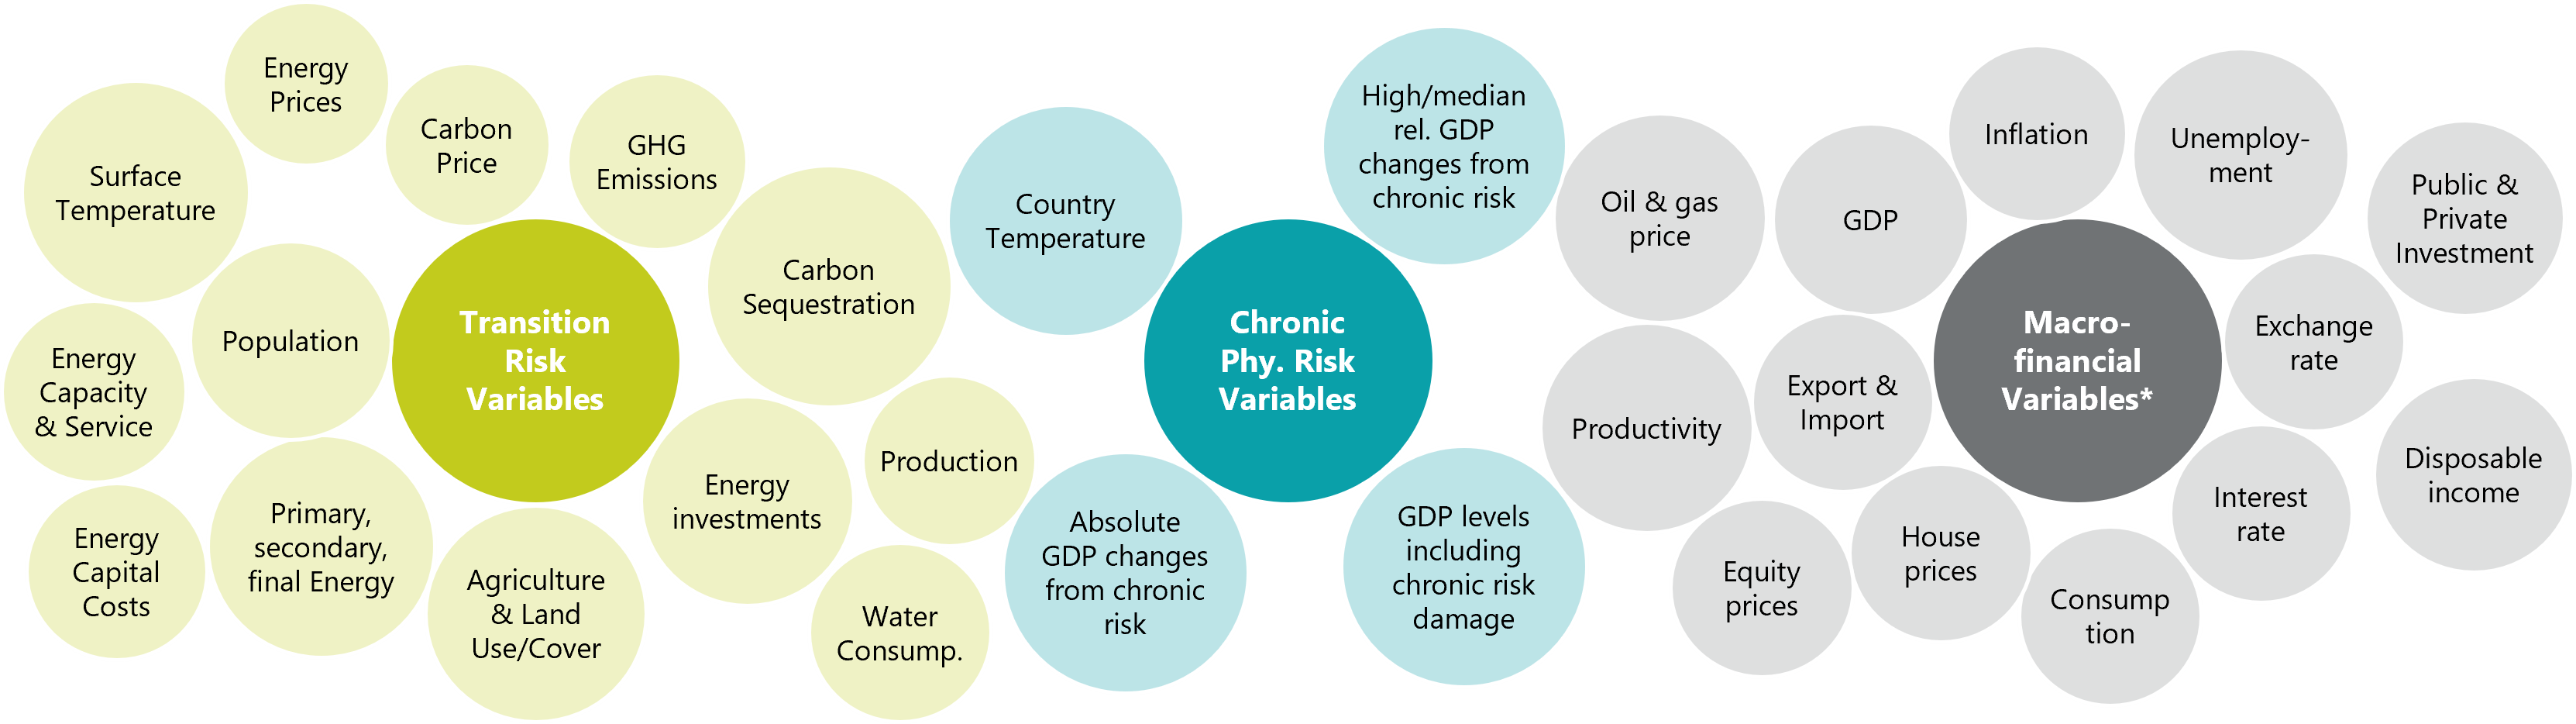

\* Macro-financial variables are given for a baseline and its transition, chronic, combined and acute (by hazard, and for GDP only) risk deviations.

### Macro-financial variables

*Reference price levels in units may differ for different regions.

---

Category | Variable | Units* | Available Models
--- | --- | --- | ---
Macro-financial | Carbon pricing ; \$ per Tn CO2 | \S per Tn CO2 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Carbon pricing ; \$ per Tn CO2(chronic) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Carbon pricing ; \$ per Tn CO2(combined (no bus)) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Carbon pricing ; \$ per Tn CO2(combined) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Carbon pricing ; \$ per Tn CO2(transition) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Central bank Intervention rate (policy interest rate) ; % | % | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Central bank Intervention rate (policy interest rate) ; %(chronic) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Central bank Intervention rate (policy interest rate) ; %(combined (no bus)) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Central bank Intervention rate (policy interest rate) ; %(combined) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Central bank Intervention rate (policy interest rate) ; %(transition) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Coal price ; US\$ per barrel (equiv) | US\S per barrel (equiv) | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Coal price ; US\$ per barrel (equiv)(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Coal price ; US\$ per barrel (equiv)(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Coal price ; US\$ per barrel (equiv)(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Coal price ; US\$ per barrel (equiv)(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Consumption (private) | 2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Consumption (private)(chronic) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Consumption (private)(combined (no bus)) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Consumption (private)(combined) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Consumption (private)(transition) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Domestic demand | 2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Domestic demand(chronic) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Domestic demand(combined (no bus)) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Domestic demand(combined) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Domestic demand(transition) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Effective exchange rate | index; 2017=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Effective exchange rate(chronic) | % difference,  index; 2017=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Effective exchange rate(combined (no bus)) | % difference,  index; 2017=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Effective exchange rate(combined) | % difference,  index; 2017=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Effective exchange rate(transition) | % difference,  index; 2017=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Energy consumption (total) ; MnToe | MnToe | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Energy consumption (total) ; MnToe(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Energy consumption (total) ; MnToe(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Energy consumption (total) ; MnToe(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Energy consumption (total) ; MnToe(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Equity prices | index; 2017=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Equity prices(chronic) | % difference,  index; 2017=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Equity prices(combined (no bus)) | % difference,  index; 2017=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Equity prices(combined) | % difference,  index; 2017=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Equity prices(transition) | % difference,  index; 2017=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate ; domestic per US\$ | domestic per US\S | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate ; domestic per US\$(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate ; domestic per US\$(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate ; domestic per US\$(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate ; domestic per US\$(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate ; per US\$ | per US\S | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate ; per US\$(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate ; per US\$(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate ; per US\$(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate ; per US\$(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate; local per US\$ | local per US\S | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate; local per US\$(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate; local per US\$(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate; local per US\$(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exchange rate; local per US\$(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exports (goods and services excl. MTIC) | 2019 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exports (goods and services excl. MTIC)(chronic) | % difference,  2019 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exports (goods and services excl. MTIC)(combined (no bus)) | % difference,  2019 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exports (goods and services excl. MTIC)(combined) | % difference,  2019 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exports (goods and services excl. MTIC)(transition) | % difference,  2019 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exports (goods and services) | 2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exports (goods and services)(chronic) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exports (goods and services)(combined (no bus)) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exports (goods and services)(combined) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Exports (goods and services)(transition) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gas price ; US\$ per barrel (equiv) | US\S per barrel (equiv) | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gas price ; US\$ per barrel (equiv)(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gas price ; US\$ per barrel (equiv)(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gas price ; US\$ per barrel (equiv)(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gas price ; US\$ per barrel (equiv)(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gov. consumption | 2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gov. consumption(chronic) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gov. consumption(combined (no bus)) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gov. consumption(combined) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gov. consumption(transition) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross domestic income; local currency | local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross domestic income; local currency(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross domestic income; local currency(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross domestic income; local currency(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross domestic income; local currency(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross Domestic Product (GDP) | 2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross Domestic Product (GDP)(chronic) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross Domestic Product (GDP)(combined (no bus)) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross Domestic Product (GDP)(combined) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross Domestic Product (GDP)(cyclone-60) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(cyclone-65) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(cyclone-70) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(cyclone-75) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(cyclone-80) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(cyclone-85) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(cyclone-90) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(cyclone-95) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(cyclone-99) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(drought-60) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(drought-65) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(drought-70) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(drought-75) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(drought-80) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(drought-85) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(drought-90) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(drought-95) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(drought-99) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(flood) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(heatwave-60) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(heatwave-65) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(heatwave-70) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(heatwave-75) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(heatwave-80) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(heatwave-85) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(heatwave-90) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(heatwave-95) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(heatwave-99) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[Climate Analytics]
Macro-financial | Gross Domestic Product (GDP)(transition) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross operating surplus | pte corporations; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross operating surplus(chronic) | % difference,  pte corporations; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross operating surplus(combined (no bus)) | % difference,  pte corporations; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross operating surplus(combined) | % difference,  pte corporations; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Gross operating surplus(transition) | % difference,  pte corporations; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | House prices (residential) | index; 2015=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | House prices (residential)(chronic) | % difference,  index; 2015=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | House prices (residential)(combined (no bus)) | % difference,  index; 2015=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | House prices (residential)(combined) | % difference,  index; 2015=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | House prices (residential)(transition) | % difference,  index; 2015=100 | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Asia GDP | 2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Asia GDP(chronic) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Asia GDP(combined (no bus)) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Asia GDP(combined) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Asia GDP(transition) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Asia Inflation rate ; % | % | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Asia Inflation rate ; %(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Asia Inflation rate ; %(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Asia Inflation rate ; %(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Asia Inflation rate ; %(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Europe GDP | 2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Europe GDP(chronic) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Europe GDP(combined (no bus)) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Europe GDP(combined) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Europe GDP(transition) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Europe Inflation rate ; % | % | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Europe Inflation rate ; %(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Europe Inflation rate ; %(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Europe Inflation rate ; %(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Emerging and developing Europe Inflation rate ; %(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Latin America and the Caribbean GDP | 2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Latin America and the Caribbean GDP(chronic) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Latin America and the Caribbean GDP(combined (no bus)) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Latin America and the Caribbean GDP(combined) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Latin America and the Caribbean GDP(transition) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Latin America and the Caribbean Inflation rate ; % | % | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Latin America and the Caribbean Inflation rate ; %(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Latin America and the Caribbean Inflation rate ; %(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Latin America and the Caribbean Inflation rate ; %(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Latin America and the Caribbean Inflation rate ; %(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Middle East and Central Asia GDP | 2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Middle East and Central Asia GDP(chronic) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Middle East and Central Asia GDP(combined (no bus)) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Middle East and Central Asia GDP(combined) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Middle East and Central Asia GDP(transition) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Middle East and Central Asia Inflation rate ; % | % | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Middle East and Central Asia Inflation rate ; %(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Middle East and Central Asia Inflation rate ; %(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Middle East and Central Asia Inflation rate ; %(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Middle East and Central Asia Inflation rate ; %(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Sub-Saharan Africa GDP | 2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Sub-Saharan Africa GDP(chronic) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Sub-Saharan Africa GDP(combined (no bus)) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Sub-Saharan Africa GDP(combined) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Sub-Saharan Africa GDP(transition) | % difference,  2017 PPP ; US\S Bn | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Sub-Saharan Africa Inflation rate ; % | % | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Sub-Saharan Africa Inflation rate ; %(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Sub-Saharan Africa Inflation rate ; %(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Sub-Saharan Africa Inflation rate ; %(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | IMF Sub-Saharan Africa Inflation rate ; %(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Imports (goods and services excl MTIC) | 2019 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Imports (goods and services excl MTIC)(chronic) | % difference,  2019 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Imports (goods and services excl MTIC)(combined (no bus)) | % difference,  2019 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Imports (goods and services excl MTIC)(combined) | % difference,  2019 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Imports (goods and services excl MTIC)(transition) | % difference,  2019 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Imports (goods and services) | 2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Imports (goods and services)(chronic) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Imports (goods and services)(combined (no bus)) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Imports (goods and services)(combined) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Imports (goods and services)(transition) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Inflation rate ; % | % | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Inflation rate ; %(chronic) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Inflation rate ; %(combined (no bus)) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Inflation rate ; %(combined) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Inflation rate ; %(transition) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Investment (gov.) | 2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Investment (gov.)(chronic) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Investment (gov.)(combined (no bus)) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Investment (gov.)(combined) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Investment (gov.)(transition) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Investment (private sector) | 2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Investment (private sector)(chronic) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Investment (private sector)(combined (no bus)) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Investment (private sector)(combined) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Investment (private sector)(transition) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Long term interest rate ; % | % | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Long term interest rate ; %(chronic) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Long term interest rate ; %(combined (no bus)) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Long term interest rate ; %(combined) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Long term interest rate ; %(transition) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Long term real interest rate ; % | % | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Long term real interest rate ; %(chronic) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Long term real interest rate ; %(combined (no bus)) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Long term real interest rate ; %(combined) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Long term real interest rate ; %(transition) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Oil price ; US\$ per barrel | US\S per barrel | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Oil price ; US\$ per barrel(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Oil price ; US\$ per barrel(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Oil price ; US\$ per barrel(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Oil price ; US\$ per barrel(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Productivity (output per hour worked); local currency | local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Productivity (output per hour worked); local currency(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Productivity (output per hour worked); local currency(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Productivity (output per hour worked); local currency(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Productivity (output per hour worked); local currency(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of coal ; MnToe | MnToe | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of coal ; MnToe(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of coal ; MnToe(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of coal ; MnToe(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of coal ; MnToe(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of gas ; MnToe | MnToe | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of gas ; MnToe(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of gas ; MnToe(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of gas ; MnToe(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of gas ; MnToe(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of non-carbon ; MnToe | MnToe | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of non-carbon ; MnToe(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of non-carbon ; MnToe(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of non-carbon ; MnToe(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of non-carbon ; MnToe(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of oil ; MnToe | MnToe | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of oil ; MnToe(chronic) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of oil ; MnToe(combined (no bus)) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of oil ; MnToe(combined) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Quarterly consumption of oil ; MnToe(transition) | % difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Real personal disposable income | 2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Real personal disposable income(chronic) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Real personal disposable income(combined (no bus)) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Real personal disposable income(combined) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Real personal disposable income(transition) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Revenue from CB or BCA tax; local currency | local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Revenue from CB or BCA tax; local currency(chronic) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Revenue from CB or BCA tax; local currency(combined (no bus)) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Revenue from CB or BCA tax; local currency(combined) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Revenue from CB or BCA tax; local currency(transition) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Trend output for capacity utilisation | 2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Trend output for capacity utilisation(chronic) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Trend output for capacity utilisation(combined (no bus)) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Trend output for capacity utilisation(combined) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Trend output for capacity utilisation(transition) | % difference,  2015 prices; local currency | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Unemployment rate ; % | % | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Unemployment rate ; %(chronic) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Unemployment rate ; %(combined (no bus)) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Unemployment rate ; %(combined) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Unemployment rate ; %(transition) | Abs. difference | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Volume energy use as a share of GDP ; Bn US\$(PPP) | 2017 prices | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Volume energy use as a share of GDP ; Bn US\$(PPP)(chronic) | % difference,  2017 prices | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Volume energy use as a share of GDP ; Bn US\$(PPP)(combined (no bus)) | % difference,  2017 prices | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Volume energy use as a share of GDP ; Bn US\$(PPP)(combined) | % difference,  2017 prices | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]
Macro-financial | Volume energy use as a share of GDP ; Bn US\$(PPP)(transition) | % difference,  2017 prices | NiGEM NGFS v1.23.2[GCAM 6.0 NGFS], NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12], NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]




### Transition pathway variables

Category | Variable | Units | Available Models
--- | --- | --- | ---
Transition | Agricultural Demand | million t DM/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Demand\|Crops | million t DM/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Demand\|Crops\|Energy | million t DM/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Demand\|Crops\|Energy\|1st generation | million t DM/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Demand\|Crops\|Energy\|2nd generation | million t DM/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Demand\|Crops\|Feed | million t DM/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Demand\|Crops\|Food | million t DM/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Demand\|Crops\|Other | million t DM/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Demand\|Livestock | million t DM/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Demand\|Livestock\|Food | million t DM/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Demand\|Livestock\|Other | million t DM/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Production | million t DM/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Production\|Energy | million t DM/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Production\|Energy\|Crops | million t DM/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Production\|Energy\|Residues | million t DM/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Production\|Non-Energy | million t DM/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Production\|Non-Energy\|Crops | million t DM/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Agricultural Production\|Non-Energy\|Livestock | million t DM/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|CH4\|MAGICCv7.5.3\|33.0th Percentile | ppb | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|CH4\|MAGICCv7.5.3\|5.0th Percentile | ppb | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|CH4\|MAGICCv7.5.3\|50.0th Percentile | ppb | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|CH4\|MAGICCv7.5.3\|67.0th Percentile | ppb | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|CH4\|MAGICCv7.5.3\|95.0th Percentile | ppb | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|CO2\|MAGICCv7.5.3\|33.0th Percentile | ppm | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|CO2\|MAGICCv7.5.3\|5.0th Percentile | ppm | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|CO2\|MAGICCv7.5.3\|50.0th Percentile | ppm | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|CO2\|MAGICCv7.5.3\|67.0th Percentile | ppm | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|N2O\|MAGICCv7.5.3\|33.0th Percentile | ppb | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|N2O\|MAGICCv7.5.3\|5.0th Percentile | ppb | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|N2O\|MAGICCv7.5.3\|50.0th Percentile | ppb | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|N2O\|MAGICCv7.5.3\|67.0th Percentile | ppb | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Atmospheric Concentrations\|N2O\|MAGICCv7.5.3\|95.0th Percentile | ppb | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Aerosols\|MAGICCv7.5.3\|33.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Aerosols\|MAGICCv7.5.3\|5.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Aerosols\|MAGICCv7.5.3\|50.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Aerosols\|MAGICCv7.5.3\|67.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Aerosols\|MAGICCv7.5.3\|95.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Anthropogenic\|MAGICCv7.5.3\|33.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Anthropogenic\|MAGICCv7.5.3\|5.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Anthropogenic\|MAGICCv7.5.3\|50.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Anthropogenic\|MAGICCv7.5.3\|67.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Anthropogenic\|MAGICCv7.5.3\|95.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Greenhouse Gases\|MAGICCv7.5.3\|33.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Greenhouse Gases\|MAGICCv7.5.3\|5.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Greenhouse Gases\|MAGICCv7.5.3\|50.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Greenhouse Gases\|MAGICCv7.5.3\|67.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Greenhouse Gases\|MAGICCv7.5.3\|95.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Non-CO2 Anthropogenic\|MAGICCv7.5.3\|33.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Non-CO2 Anthropogenic\|MAGICCv7.5.3\|5.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Non-CO2 Anthropogenic\|MAGICCv7.5.3\|50.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Non-CO2 Anthropogenic\|MAGICCv7.5.3\|67.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Non-CO2 Anthropogenic\|MAGICCv7.5.3\|95.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Non-CO2 Greenhouse Gases\|MAGICCv7.5.3\|33.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Non-CO2 Greenhouse Gases\|MAGICCv7.5.3\|5.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Non-CO2 Greenhouse Gases\|MAGICCv7.5.3\|50.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Non-CO2 Greenhouse Gases\|MAGICCv7.5.3\|67.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Basket\|Non-CO2 Greenhouse Gases\|MAGICCv7.5.3\|95.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|CH4\|MAGICCv7.5.3\|33.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|CH4\|MAGICCv7.5.3\|5.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|CH4\|MAGICCv7.5.3\|50.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|CH4\|MAGICCv7.5.3\|67.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|CH4\|MAGICCv7.5.3\|95.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|CO2\|MAGICCv7.5.3\|33.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|CO2\|MAGICCv7.5.3\|5.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|CO2\|MAGICCv7.5.3\|50.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|CO2\|MAGICCv7.5.3\|67.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|F-Gases\|MAGICCv7.5.3\|33.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|F-Gases\|MAGICCv7.5.3\|5.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|F-Gases\|MAGICCv7.5.3\|50.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|F-Gases\|MAGICCv7.5.3\|67.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|F-Gases\|MAGICCv7.5.3\|95.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|MAGICCv7.5.3\|33.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|MAGICCv7.5.3\|5.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|MAGICCv7.5.3\|50.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|MAGICCv7.5.3\|67.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|MAGICCv7.5.3\|95.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Montreal Protocol Halogen Gases\|MAGICCv7.5.3\|33.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Montreal Protocol Halogen Gases\|MAGICCv7.5.3\|5.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Montreal Protocol Halogen Gases\|MAGICCv7.5.3\|50.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Montreal Protocol Halogen Gases\|MAGICCv7.5.3\|67.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Montreal Protocol Halogen Gases\|MAGICCv7.5.3\|95.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|N2O\|MAGICCv7.5.3\|33.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|N2O\|MAGICCv7.5.3\|5.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|N2O\|MAGICCv7.5.3\|50.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|N2O\|MAGICCv7.5.3\|67.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|N2O\|MAGICCv7.5.3\|95.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Ozone\|MAGICCv7.5.3\|33.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Ozone\|MAGICCv7.5.3\|5.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Ozone\|MAGICCv7.5.3\|50.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Ozone\|MAGICCv7.5.3\|67.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Effective Radiative Forcing\|Ozone\|MAGICCv7.5.3\|95.0th Percentile | W/m^2 | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Exceedance Probability 1.5C\|MAGICCv7.5.3 | dimensionless | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Exceedance Probability 2.0C\|MAGICCv7.5.3 | dimensionless | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Exceedance Probability 2.5C\|MAGICCv7.5.3 | dimensionless | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Exceedance Probability 3.0C\|MAGICCv7.5.3 | dimensionless | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|10.0th Percentile | K | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|16.7th Percentile | K | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|17.0th Percentile | K | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|25.0th Percentile | K | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|33.0th Percentile | K | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|5.0th Percentile | K | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|50.0th Percentile | K | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|66.0th Percentile | K | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|67.0th Percentile | K | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|75.0th Percentile | K | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|83.0th Percentile | K | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|83.3th Percentile | K | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|90.0th Percentile | K | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | AR6 climate diagnostics\|Surface Temperature (GSAT)\|MAGICCv7.5.3\|95.0th Percentile | K | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Biomass | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Biomass\|w/ CCS | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Biomass\|w/o CCS | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Coal | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Coal\|w/ CCS | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Coal\|w/o CCS | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Gas | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Gas\|w/ CCS | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Gas\|w/o CCS | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Geothermal | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Hydro | GW/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Nuclear | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Oil | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Oil\|w/ CCS | GW/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capacity Additions\|Electricity\|Oil\|w/o CCS | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capacity Additions\|Electricity\|Solar | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Solar\|CSP | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Solar\|PV | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Storage Capacity | GWh/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Wind | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Wind\|Offshore | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity Additions\|Electricity\|Wind\|Onshore | GW/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Biomass | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Biomass\|w/ CCS | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Biomass\|w/o CCS | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Coal | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Coal\|w/ CCS | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Coal\|w/o CCS | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Gas | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Gas\|w/ CCS | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Gas\|w/o CCS | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Geothermal | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Hydro | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Nuclear | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Oil | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Oil\|w/ CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capacity\|Electricity\|Oil\|w/o CCS | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Other | GW | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Solar | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Solar\|CSP | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Solar\|PV | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Storage | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Wind | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Wind\|Offshore | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Electricity\|Wind\|Onshore | GW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Gases | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Gases\|Biomass | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Gases\|Biomass\|w/o CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capacity\|Gases\|Coal | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Gases\|Coal\|w/o CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capacity\|Hydrogen | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Hydrogen\|Biomass | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Hydrogen\|Biomass\|w/ CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Hydrogen\|Biomass\|w/o CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Hydrogen\|Coal | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Hydrogen\|Coal\|w/ CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Hydrogen\|Coal\|w/o CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Hydrogen\|Electricity | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Hydrogen\|Gas | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Hydrogen\|Gas\|w/ CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Hydrogen\|Gas\|w/o CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Liquids | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Liquids\|Biomass | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Liquids\|Biomass\|w/ CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capacity\|Liquids\|Biomass\|w/o CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capacity\|Liquids\|Coal | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capacity\|Liquids\|Coal\|w/ CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capacity\|Liquids\|Coal\|w/o CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capacity\|Liquids\|Gas | GW | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capacity\|Liquids\|Gas\|w/ CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capacity\|Liquids\|Gas\|w/o CCS | GW | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capacity\|Liquids\|Oil | GW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Biomass\|w/ CCS | US\S2010/kW | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Biomass\|w/o CCS | US\S2010/kW | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Coal\|w/ CCS | US\S2010/kW | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Coal\|w/o CCS | US\S2010/kW | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Gas\|w/ CCS | US\S2010/kW | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Gas\|w/o CCS | US\S2010/kW | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Geothermal | US\S2010/kW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Hydro | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Nuclear | US\S2010/kW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Solar\|CSP | US\S2010/kW | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Solar\|PV | US\S2010/kW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Wind\|Offshore | US\S2010/kW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Electricity\|Wind\|Onshore | US\S2010/kW | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Gases\|Biomass\|w/o CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Gases\|Coal\|w/o CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Hydrogen\|Biomass\|w/ CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Hydrogen\|Biomass\|w/o CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Hydrogen\|Coal\|w/ CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Hydrogen\|Coal\|w/o CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Hydrogen\|Electricity | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Hydrogen\|Gas\|w/ CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Hydrogen\|Gas\|w/o CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Liquids\|Biomass\|w/ CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Liquids\|Biomass\|w/o CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Liquids\|Coal\|w/ CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Liquids\|Coal\|w/o CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Capital Cost\|Liquids\|Gas\|w/ CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capital Cost\|Liquids\|Gas\|w/o CCS | US\S2010/kW | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Capital Cost\|Liquids\|Oil | US\S2010/kW | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Carbon Sequestration\|CCS | Mt CO2/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Carbon Sequestration\|CCS\|Biomass | Mt CO2/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Carbon Sequestration\|CCS\|Biomass\|Energy\|Demand\|Industry | Mt CO2/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Carbon Sequestration\|CCS\|Biomass\|Energy\|Supply | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Carbon Sequestration\|CCS\|Biomass\|Energy\|Supply\|Electricity | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Carbon Sequestration\|CCS\|Biomass\|Energy\|Supply\|Hydrogen | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Carbon Sequestration\|CCS\|Biomass\|Energy\|Supply\|Liquids | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Carbon Sequestration\|CCS\|Fossil | Mt CO2/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Carbon Sequestration\|CCS\|Fossil\|Energy\|Demand\|Industry | Mt CO2/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Carbon Sequestration\|CCS\|Fossil\|Energy\|Supply | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Carbon Sequestration\|CCS\|Fossil\|Energy\|Supply\|Electricity | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Carbon Sequestration\|CCS\|Fossil\|Energy\|Supply\|Hydrogen | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Carbon Sequestration\|CCS\|Fossil\|Energy\|Supply\|Liquids | Mt CO2/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Carbon Sequestration\|CCS\|Industrial Processes | Mt CO2/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Carbon Sequestration\|Land Use | Mt CO2/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Carbon Sequestration\|Land Use\|Afforestation | Mt CO2/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Consumption | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|BC | Mt BC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|BC\|AFOLU | Mt BC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|BC\|Energy | Mt BC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|BC\|Energy\|Demand\|Industry | Mt BC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|BC\|Energy\|Demand\|Residential and Commercial | Mt BC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|BC\|Energy\|Demand\|Transportation | Mt BC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|BC\|Energy\|Supply | Mt BC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|C2F6 | kt C2F6/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|C6F14 | kt C6F14/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CF4 | kt CF4/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CH4 | Mt CH4/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CH4\|AFOLU | Mt CH4/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CH4\|Energy | Mt CH4/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|CH4\|Energy\|Demand\|Industry | Mt CH4/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|CH4\|Energy\|Demand\|Residential and Commercial | Mt CH4/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|CH4\|Energy\|Demand\|Transportation | Mt CH4/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|CH4\|Energy\|Supply | Mt CH4/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CH4\|Other | Mt CH4/yr | GCAM 6.0 NGFS
Transition | Emissions\|CO | Mt CO/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO\|AFOLU | Mt CO/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO\|Energy | Mt CO/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO\|Energy\|Demand\|Industry | Mt CO/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO\|Energy\|Demand\|Residential and Commercial | Mt CO/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO\|Energy\|Demand\|Transportation | Mt CO/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO\|Energy\|Supply | Mt CO/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2 | Mt CO2/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Emissions\|CO2\|AFOLU | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy | Mt CO2/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Emissions\|CO2\|Energy and Industrial Processes | Mt CO2/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|AFOFI | Mt CO2/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|CO2\|Energy\|Demand\|Industry | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Industry\|Cement | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Industry\|Chemicals | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Industry\|Chemicals\|Ammonia | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|CO2\|Energy\|Demand\|Industry\|Chemicals\|High value chemicals | Mt CO2/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|CO2\|Energy\|Demand\|Industry\|Non-ferrous metals | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|CO2\|Energy\|Demand\|Industry\|Other | Mt CO2/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Industry\|Steel | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Residential and Commercial | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Residential and Commercial\|Commercial | Mt CO2/yr | GCAM 6.0 NGFS
Transition | Emissions\|CO2\|Energy\|Demand\|Residential and Commercial\|Residential | Mt CO2/yr | GCAM 6.0 NGFS
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Aviation | Mt CO2/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Aviation\|Passenger | Mt CO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Freight | Mt CO2/yr | GCAM 6.0 NGFS
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Maritime\|Freight | Mt CO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Passenger | Mt CO2/yr | GCAM 6.0 NGFS
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Rail | Mt CO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Rail\|Freight | Mt CO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Rail\|Passenger | Mt CO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Road | Mt CO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Road\|Freight | Mt CO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Road\|Passenger | Mt CO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Road\|Passenger\|Bus | Mt CO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Demand\|Transportation\|Road\|Passenger\|LDV | Mt CO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Supply | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Supply\|Electricity | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Supply\|Gases | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Supply\|Heat | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Supply\|Liquids | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Supply\|Other Sector | Mt CO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Energy\|Supply\|Solids | Mt CO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|CO2\|Industrial Processes | Mt CO2/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Emissions\|CO2\|LULUCF Direct+Indirect | Mt CO2/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Emissions\|CO2\|LULUCF Indirect | Mt CO2/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Emissions\|F-Gases | Mt CO2-equiv/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|HFC | kt HFC134a-equiv/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|HFC\|HFC125 | kt HFC125/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|HFC\|HFC134a | kt HFC134a/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|HFC\|HFC143a | kt HFC143a/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|HFC\|HFC227ea | kt HFC227ea/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|HFC\|HFC23 | kt HFC23/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|HFC\|HFC245fa | kt HFC245fa/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|HFC\|HFC32 | kt HFC32/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|HFC\|HFC43-10 | kt HFC43-10/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|Kyoto Gases (incl. indirect LULUCF) | Mt CO2-equiv/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Emissions\|Kyoto Gases | Mt CO2-equiv/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Kyoto Gases\|AFOLU | Mt CO2-equiv/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Kyoto Gases\|Cement | Mt CO2-equiv/yr | GCAM 6.0 NGFS
Transition | Emissions\|Kyoto Gases\|Chemicals | Mt CO2-equiv/yr | GCAM 6.0 NGFS
Transition | Emissions\|Kyoto Gases\|Electricity | Mt CO2-equiv/yr | GCAM 6.0 NGFS
Transition | Emissions\|Kyoto Gases\|Industry | Mt CO2-equiv/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Kyoto Gases\|Other | Mt CO2-equiv/yr | GCAM 6.0 NGFS
Transition | Emissions\|Kyoto Gases\|Other Energy Supply | Mt CO2-equiv/yr | GCAM 6.0 NGFS
Transition | Emissions\|Kyoto Gases\|Other Industry | Mt CO2-equiv/yr | GCAM 6.0 NGFS
Transition | Emissions\|Kyoto Gases\|Residential and Commercial | Mt CO2-equiv/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Kyoto Gases\|Steel | Mt CO2-equiv/yr | GCAM 6.0 NGFS
Transition | Emissions\|Kyoto Gases\|Supply | Mt CO2-equiv/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Kyoto Gases\|Transportation | Mt CO2-equiv/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|N2O | kt N2O/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|N2O\|AFOLU | kt N2O/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|N2O\|Energy | kt N2O/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Emissions\|N2O\|Other | kt N2O/yr | GCAM 6.0 NGFS
Transition | Emissions\|NH3 | Mt NH3/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NH3\|AFOLU | Mt NH3/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NH3\|Energy | Mt NH3/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NH3\|Energy\|Demand\|Industry | Mt NH3/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NH3\|Energy\|Demand\|Residential and Commercial | Mt NH3/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NH3\|Energy\|Demand\|Transportation | Mt NH3/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NH3\|Energy\|Supply | Mt NH3/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NH3\|Other | Mt NH3/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NH3\|Waste | Mt NH3/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NOx | Mt NO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NOx\|AFOLU | Mt NO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NOx\|Energy | Mt NO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NOx\|Energy\|Demand\|Industry | Mt NO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NOx\|Energy\|Demand\|Residential and Commercial | Mt NO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NOx\|Energy\|Demand\|Transportation | Mt NO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NOx\|Energy\|Supply | Mt NO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NOx\|Other | Mt NO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|NOx\|Waste | Mt NO2/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|OC | Mt OC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|OC\|AFOLU | Mt OC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|OC\|Energy | Mt OC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|OC\|Energy\|Demand\|Industry | Mt OC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|OC\|Energy\|Demand\|Residential and Commercial | Mt OC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|OC\|Energy\|Demand\|Transportation | Mt OC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|OC\|Energy\|Supply | Mt OC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|OC\|Other | Mt OC/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|OC\|Waste | Mt OC/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|PFC | kt CF4-equiv/yr | GCAM 6.0 NGFS
Transition | Emissions\|SF6 | kt SF6/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Sulfur | Mt SO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Sulfur\|AFOLU | Mt SO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Sulfur\|Energy | Mt SO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Sulfur\|Energy\|Demand\|Industry | Mt SO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Sulfur\|Energy\|Demand\|Residential and Commercial | Mt SO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Sulfur\|Energy\|Demand\|Transportation | Mt SO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Sulfur\|Energy\|Supply | Mt SO2/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Sulfur\|Other | Mt SO2/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Sulfur\|Waste | Mt SO2/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|Total Non-CO2 | Mt CO2-equiv/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Emissions\|VOC | Mt VOC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|VOC\|AFOLU | Mt VOC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|VOC\|Energy | Mt VOC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|VOC\|Energy\|Demand\|Industry | Mt VOC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|VOC\|Energy\|Demand\|Residential and Commercial | Mt VOC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|VOC\|Energy\|Demand\|Transportation | Mt VOC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|VOC\|Energy\|Supply | Mt VOC/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|VOC\|Other | Mt VOC/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Emissions\|VOC\|Waste | Mt VOC/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Residential and Commercial\|Floor Space | billion m2 | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Residential and Commercial\|Residential\|Floor Space | billion m2 | GCAM 6.0 NGFS
Transition | Energy Service\|Transportation\|Aviation | billion vkm/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Freight | billion tkm/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Freight\|International Shipping | billion tkm/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Freight\|Navigation | billion tkm/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Freight\|Railways | billion tkm/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Freight\|Road | billion tkm/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Navigation | billion vkm/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Passenger | billion pkm/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Passenger\|Aviation | billion pkm/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Passenger\|Bicycling and Walking | billion pkm/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Passenger\|Railways | billion pkm/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Passenger\|Road | billion pkm/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Passenger\|Road\|Bus | billion pkm/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Passenger\|Road\|LDV | billion pkm/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Rail | billion vkm/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Energy Service\|Transportation\|Road | billion vkm/yr | GCAM 6.0 NGFS
Transition | Fertilizer Use\|Nitrogen | Tg N/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Fertilizer Use\|Phosphorus | Tg P/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Electricity | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Gases | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Geothermal | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Heat | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Hydrogen | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Industry | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Industry\|Cement | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Cement\|Electricity | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Cement\|Gases | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Cement\|Heat | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Cement\|Hydrogen | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Cement\|Liquids | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Cement\|Solids | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Chemicals | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Chemicals\|Ammonia | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Industry\|Chemicals\|Ammonia\|Gases | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Industry\|Chemicals\|Ammonia\|Hydrogen | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Industry\|Chemicals\|Ammonia\|Liquids | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Industry\|Chemicals\|Ammonia\|Solids | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Industry\|Chemicals\|Ammonia\|Solids\|Fossil | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Industry\|Chemicals\|Electricity | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Chemicals\|Gases | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Chemicals\|Heat | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Chemicals\|High value chemicals | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Chemicals\|High value chemicals\|Electricity | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Chemicals\|High value chemicals\|Gases | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Chemicals\|High value chemicals\|Heat | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Chemicals\|High value chemicals\|Hydrogen | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Chemicals\|High value chemicals\|Liquids | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Chemicals\|High value chemicals\|Solids | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Chemicals\|Hydrogen | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Chemicals\|Liquids | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Chemicals\|Solids | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Chemicals\|Solids\|Bioenergy | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Industry\|Chemicals\|Solids\|Fossil | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Industry\|Electricity | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Industry\|Electricity\|Share | % | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Gases | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Industry\|Gases\|Bioenergy | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Heat | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Industry\|Hydrogen | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Industry\|Liquids | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Industry\|Liquids\|Biomass | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12]
Transition | Final Energy\|Industry\|Liquids\|Coal | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12]
Transition | Final Energy\|Industry\|Liquids\|Oil | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12]
Transition | Final Energy\|Industry\|Non-ferrous metals | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Non-ferrous metals\|Electricity | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Non-ferrous metals\|Gases | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Non-ferrous metals\|Heat | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Non-ferrous metals\|Hydrogen | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Non-ferrous metals\|Liquids | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Non-ferrous metals\|Solids | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Non-ferrous metals\|Solids\|Bioenergy | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Industry\|Non-ferrous metals\|Solids\|Fossil | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Industry\|Other | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Other\|Electricity | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Other\|Gases | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Other\|Heat | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Other\|Hydrogen | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Other\|Liquids | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Other\|Solids | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Solids | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Industry\|Solids\|Biomass | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Industry\|Solids\|Coal | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Industry\|Steel | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Steel\|Electricity | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Steel\|Gases | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Steel\|Heat | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Industry\|Steel\|Hydrogen | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Steel\|Liquids | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Steel\|Solids | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Industry\|Steel\|Solids\|Bioenergy | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Industry\|Steel\|Solids\|Fossil | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Liquids | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Non-Energy Use | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Non-Energy Use\|Biomass | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Non-Energy Use\|Coal | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Non-Energy Use\|Gas | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Non-Energy Use\|Oil | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Other Sector | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Other Sector\|Electricity | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Other Sector\|Gases | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Other Sector\|Heat | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Other Sector\|Hydrogen | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Other Sector\|Liquids | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Residential and Commercial | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Residential and Commercial\|Commercial\|Cooling | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Commercial\|Electricity | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Commercial\|Gases | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Commercial\|Heat | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Commercial\|Heating\|Space | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Commercial\|Hydrogen | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Commercial\|Liquids | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Commercial\|Solids | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Commercial\|Solids\|Biomass | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Commercial\|Solids\|Coal | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Cooling | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Electricity | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Residential and Commercial\|Gases | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Residential and Commercial\|Gases\|Biomass | EJ/yr | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Residential and Commercial\|Gases\|Natural Gas | EJ/yr | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Residential and Commercial\|Heat | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Residential and Commercial\|Heating | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Residential and Commercial\|Heating\|Space | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Hydrogen | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Residential and Commercial\|Liquids | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Residential and Commercial\|Liquids\|Biomass | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Residential and Commercial\|Liquids\|Coal | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Residential and Commercial\|Liquids\|Oil | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Residential and Commercial\|Other | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Residential and Commercial\|Residential\|Cooling | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Residential\|Electricity | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Residential\|Gases | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Residential\|Heat | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Residential\|Heating\|Space | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Residential\|Hydrogen | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Residential\|Liquids | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Residential and Commercial\|Solids | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Residential and Commercial\|Solids\|Biomass | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Residential and Commercial\|Solids\|Biomass\|Traditional | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Residential and Commercial\|Solids\|Coal | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Solar | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Solids | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Solids\|Biomass | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Solids\|Biomass\|Traditional | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Solids\|Coal | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Transportation\|Aviation | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Transportation\|Aviation\|Passenger | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Electricity | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Transportation\|Freight | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Freight\|Electricity | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Freight\|Gases | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Freight\|Hydrogen | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Freight\|Liquids | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Freight\|Other | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Transportation\|Gases | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Transportation\|Gases\|Bioenergy | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Gases\|Fossil | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Hydrogen | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Transportation\|Liquids | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Transportation\|Liquids\|Bioenergy | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Liquids\|Coal | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Transportation\|Liquids\|Natural Gas | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Liquids\|Oil | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Final Energy\|Transportation\|Maritime | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Maritime\|Freight | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Other | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Final Energy\|Transportation\|Passenger | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Passenger\|Electricity | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Passenger\|Gases | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Passenger\|Hydrogen | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Passenger\|Liquids | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Rail | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Rail\|Freight | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Rail\|Passenger | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Road\|Freight | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Road\|Freight\|Electric | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Road\|Freight\|FC | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Road\|Freight\|ICE | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Road\|Passenger | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Road\|Passenger\|2W&3W | EJ/yr | GCAM 6.0 NGFS
Transition | Final Energy\|Transportation\|Road\|Passenger\|Bus | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Final Energy\|Transportation\|Road\|Passenger\|LDV | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Food Demand | kcal/cap/day | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Food Demand\|Crops | kcal/cap/day | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Food Demand\|Livestock | kcal/cap/day | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Forcing | W/m2 | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Forcing\|Kyoto Gases | W/m2 | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Forestry Demand\|Roundwood | million m3/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Forestry Demand\|Roundwood\|Industrial Roundwood | million m3/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Forestry Demand\|Roundwood\|Wood Fuel | million m3/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Forestry Production\|Roundwood | million m3/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Forestry Production\|Roundwood\|Industrial Roundwood | million m3/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Forestry Production\|Roundwood\|Wood Fuel | million m3/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Investment | billion US\S2010/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|CO2 Transport and Storage | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Biomass | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Biomass\|w/ CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Biomass\|w/o CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Coal | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Coal\|w/ CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Coal\|w/o CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Electricity Storage | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Fossil | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Gas | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Gas\|w/ CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Gas\|w/o CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Geothermal | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Hydro | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Non-Biomass Renewables | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Non-fossil | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Nuclear | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Oil | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Oil\|w/ CCS | billion US\S2010/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Oil\|w/o CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Other | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Solar | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Transmission and Distribution | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Electricity\|Wind | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Extraction\|Coal | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Investment\|Energy Supply\|Extraction\|Fossil | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Investment\|Energy Supply\|Extraction\|Gas | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Investment\|Energy Supply\|Extraction\|Oil | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Investment\|Energy Supply\|Extraction\|Uranium | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Investment\|Energy Supply\|Heat | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Hydrogen | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Hydrogen\|Biomass | billion US\S2010/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Hydrogen\|Electricity | billion US\S2010/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Hydrogen\|Fossil | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Hydrogen\|Other | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Hydrogen\|Renewable | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Liquids | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Liquids\|Biomass | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Liquids\|Coal and Gas | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Liquids\|Oil | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Investment\|Energy Supply\|Other | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover | million ha | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover\|Built-up Area | million ha | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover\|Cropland | million ha | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover\|Cropland\|Cereals | million ha | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover\|Cropland\|Energy Crops | million ha | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover\|Cropland\|Irrigated | million ha | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover\|Forest | million ha | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover\|Forest\|Afforestation and Reforestation | million ha | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover\|Forest\|Managed | million ha | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover\|Forest\|Natural Forest | million ha | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover\|Forest\|Secondary | million ha | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover\|Other Land | million ha | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Land Cover\|Pasture | million ha | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Policy Cost\|Additional Total Energy System Cost | billion US\S2010/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Policy Cost\|Consumption Loss | billion US\S2010/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Policy Cost\|GDP Loss | billion US\S2010/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Population | million | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Population\|Rural | million | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Population\|Urban | million | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Post-processed\|Investment\|Energy Efficiency | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Efficiency\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Efficiency\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Biomass | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Biomass\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Biomass\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|CCS\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|CCS\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|CO2 Transport and Storage | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|CO2 Transport and Storage\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|CO2 Transport and Storage\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Biomass | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Biomass\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Biomass\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Biomass\|w/ CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Biomass\|w/ CCS\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Biomass\|w/ CCS\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Biomass\|w/o CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Biomass\|w/o CCS\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Biomass\|w/o CCS\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Coal | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Coal\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Coal\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Coal\|w/ CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Coal\|w/ CCS\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Coal\|w/ CCS\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Coal\|w/o CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Coal\|w/o CCS\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Coal\|w/o CCS\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Electricity Storage | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Electricity Storage\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Electricity Storage\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Fossil | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Fossil w/o CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Fossil w/o CCS\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Fossil w/o CCS\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Fossil\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Fossil\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Gas | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Gas\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Gas\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Gas\|w/ CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Gas\|w/ CCS\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Gas\|w/ CCS\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Gas\|w/o CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Gas\|w/o CCS\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Gas\|w/o CCS\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Geothermal | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Geothermal\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Geothermal\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Hydro | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Hydro\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Hydro\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Low Carbon | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Low Carbon\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Low Carbon\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Non-Biomass Renewables | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Non-Biomass Renewables\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Non-Biomass Renewables\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Non-fossil | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Non-fossil\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Non-fossil\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Nuclear | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Nuclear\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Nuclear\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Oil | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Oil\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Oil\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Oil\|w/ CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Oil\|w/ CCS\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Oil\|w/ CCS\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Oil\|w/o CCS | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Oil\|w/o CCS\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Oil\|w/o CCS\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Other | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Other\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Other\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Solar | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Solar\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Solar\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|T&D and Storage | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|T&D and Storage\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|T&D and Storage\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Transmission and Distribution | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Transmission and Distribution\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Transmission and Distribution\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Wind | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Wind\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Electricity\|Wind\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Bioenergy | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Bioenergy\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Bioenergy\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Coal | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Coal\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Coal\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Fossil | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Fossil\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Fossil\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Gas | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Gas\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Gas\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Oil | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Oil\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Oil\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Uranium | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Uranium\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Extraction\|Uranium\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Fossil | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Fossil\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Fossil\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Heat | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Heat\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Heat\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Fossil | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Fossil\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Fossil\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Non-fossil | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Non-fossil\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Non-fossil\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Other | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Other\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Other\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Renewable | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Renewable\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Hydrogen\|Renewable\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Liquids | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Average 2016-2030 | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Average 2016-2050 | billion US\S2010/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Biomass | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Biomass T&D | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Biomass T&D\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Biomass T&D\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Biomass\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Biomass\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Coal and Gas | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Coal and Gas\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Coal and Gas\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Fossil T&D | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Fossil T&D\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Fossil T&D\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Oil | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Oil\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Liquids\|Oil\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Low Carbon | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Low Carbon\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Low Carbon\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Nuclear | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Nuclear\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Nuclear\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Other | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Other\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Energy Supply\|Other\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Low Carbon | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Low Carbon\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Low Carbon\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Total | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Total\|Average 2016-2030 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Post-processed\|Investment\|Total\|Average 2016-2050 | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Price\|Agriculture\|Corn\|Index | Index (2005 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Agriculture\|Non-Energy Crops and Livestock\|Index | Index (2005 = 1) | MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Agriculture\|Non-Energy Crops\|Index | Index (2005 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Agriculture\|Soybean\|Index | Index (2005 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Agriculture\|Wheat\|Index | Index (2005 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Carbon | US\S2010/t CO2 | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Carbon\|Demand\|Industry | US\S2010/t CO2 | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Carbon\|Demand\|Residential and Commercial | US\S2010/t CO2 | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Carbon\|Demand\|Transportation | US\S2010/t CO2 | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Carbon\|Supply | US\S2010/t CO2 | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Industry\|Electricity | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Industry\|Gases | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Industry\|Gases\|Bioenergy | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Industry\|Gases\|Fossil | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Industry\|Hydrogen | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Industry\|Liquids | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Industry\|Liquids\|Bioenergy | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Industry\|Liquids\|Fossil synfuel | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Industry\|Solids\|Biomass | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Industry\|Solids\|Coal | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Residential and Commercial\|Residential\|Electricity | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Residential and Commercial\|Residential\|Electricity\|Index | Index (2020 = 1) | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Residential and Commercial\|Residential\|Gases\|Natural Gas | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Residential and Commercial\|Residential\|Gases\|Natural Gas\|Index | Index (2020 = 1) | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Residential and Commercial\|Residential\|Liquids\|Biomass | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Residential and Commercial\|Residential\|Liquids\|Biomass\|Index | Index (2020 = 1) | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Residential and Commercial\|Residential\|Liquids\|Oil | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Residential and Commercial\|Residential\|Liquids\|Oil\|Index | Index (2020 = 1) | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Residential and Commercial\|Residential\|Solids\|Biomass | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Residential and Commercial\|Residential\|Solids\|Biomass\|Index | Index (2020 = 1) | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Residential and Commercial\|Residential\|Solids\|Coal | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Residential and Commercial\|Residential\|Solids\|Coal\|Index | Index (2020 = 1) | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Transportation\|Electricity | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Transportation\|Gases | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Transportation\|Hydrogen | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Transportation\|Liquids | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Final Energy\|Transportation\|Liquids\|Fossil synfuel | US\S2010/GJ | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Primary Energy\|Biomass | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Primary Energy\|Biomass\|Index | Index (2020 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Primary Energy\|Coal | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Primary Energy\|Coal\|Index | Index (2020 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Primary Energy\|Gas | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Primary Energy\|Gas\|Index | Index (2020 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Primary Energy\|Oil | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Primary Energy\|Oil\|Index | Index (2020 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Electricity | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Electricity\|Index | Index (2020 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Gases\|Natural Gas | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Gases\|Natural Gas\|Index | Index (2020 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Hydrogen | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Hydrogen\|Index | Index (2020 = 1) | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Liquids | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Liquids\|Biomass | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Liquids\|Biomass\|Index | Index (2020 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Liquids\|Index | Index (2020 = 1) | REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Liquids\|Oil | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Liquids\|Oil\|Index | Index (2020 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Solids\|Coal | US\S2010/GJ | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Price\|Secondary Energy\|Solids\|Coal\|Index | Index (2020 = 1) | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Biomass | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Biomass\|1st Generation | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Biomass\|Electricity | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Biomass\|Electricity\|w/ CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Biomass\|Electricity\|w/o CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Biomass\|Energy Crops | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Biomass\|Gases | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Biomass\|Heat | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Biomass\|Hydrogen | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Biomass\|Liquids | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Biomass\|Modern | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Biomass\|Residues | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Biomass\|Solids | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Biomass\|Traditional | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Coal | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Coal\|Electricity | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Coal\|Electricity\|w/ CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Coal\|Electricity\|w/o CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Coal\|Gases | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Coal\|Heat | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Coal\|Hydrogen | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Coal\|Liquids | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Coal\|Solids | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Coal\|w/ CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Coal\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Fossil | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Fossil\|w/ CCS | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Fossil\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Gas | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Gas\|Electricity | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Gas\|Electricity\|w/ CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Gas\|Electricity\|w/o CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Gas\|Gases | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Gas\|Heat | EJ/yr | REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Gas\|Hydrogen | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Gas\|Liquids | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Gas\|Solids | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Primary Energy\|Gas\|w/ CCS | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Gas\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Geothermal | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Hydro | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Non-Biomass Renewables | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Primary Energy\|Nuclear | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Ocean | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Primary Energy\|Oil | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Oil\|Electricity | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Primary Energy\|Oil\|Electricity\|w/ CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Primary Energy\|Oil\|Electricity\|w/o CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Primary Energy\|Oil\|w/ CCS | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS]
Transition | Primary Energy\|Oil\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Other | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Primary Energy\|Secondary Energy Trade | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Primary Energy\|Solar | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Primary Energy\|Wind | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Production\|Cement | Mt/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Production\|Chemicals | Mt/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Production\|Non-ferrous metals | Mt/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Production\|Steel | Mt/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Revenue\|Government\|Tax\|Carbon | billion US\S2010/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Revenue\|Government\|Tax\|Carbon\|Demand\|Industry | billion US\S2010/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Revenue\|Government\|Tax\|Carbon\|Demand\|Residential and Commercial | billion US\S2010/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Revenue\|Government\|Tax\|Carbon\|Demand\|Transportation | billion US\S2010/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Revenue\|Government\|Tax\|Carbon\|Supply | billion US\S2010/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy | EJ/yr | GCAM 6.0 NGFS, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Electricity\|Biomass | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Electricity\|Biomass\|w/ CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity\|Biomass\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity\|Coal | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Electricity\|Coal\|w/ CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity\|Coal\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity\|Fossil | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Secondary Energy\|Electricity\|Fossil\|w/ CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Secondary Energy\|Electricity\|Fossil\|w/o CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Secondary Energy\|Electricity\|Gas | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Electricity\|Gas\|w/ CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity\|Gas\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity\|Geothermal | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Electricity\|Hydro | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Electricity\|Non-Biomass Renewables | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity\|Nuclear | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Electricity\|Oil | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Electricity\|Oil\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity\|Other | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity\|Solar | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Electricity\|Solar\|CSP | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity\|Solar\|PV | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity\|Storage Losses | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Secondary Energy\|Electricity\|Trade | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Electricity\|Transmission Losses | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Secondary Energy\|Electricity\|Wind | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Electricity\|Wind\|Offshore | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Electricity\|Wind\|Onshore | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Gases | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Gases\|Biomass | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Gases\|Coal | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Gases\|Natural Gas | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Gases\|Other | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Heat | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Heat\|Biomass | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Heat\|Coal | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Heat\|Gas | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Heat\|Geothermal | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Heat\|Oil | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Secondary Energy\|Heat\|Other | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Secondary Energy\|Hydrogen | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Hydrogen\|Biomass | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Hydrogen\|Biomass\|w/ CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Hydrogen\|Biomass\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Hydrogen\|Coal | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Hydrogen\|Coal\|w/ CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Hydrogen\|Coal\|w/o CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Hydrogen\|Electricity | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Hydrogen\|Fossil | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Hydrogen\|Fossil\|w/ CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Hydrogen\|Fossil\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Hydrogen\|Gas | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Hydrogen\|Gas\|w/ CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Hydrogen\|Gas\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Liquids | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Liquids\|Biomass | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Liquids\|Biomass\|w/ CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Liquids\|Biomass\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Liquids\|Coal | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Liquids\|Coal\|w/ CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Liquids\|Coal\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Liquids\|Fossil | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Liquids\|Fossil\|w/ CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Liquids\|Fossil\|w/o CCS | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Liquids\|Gas | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Liquids\|Gas\|w/ CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Liquids\|Gas\|w/o CCS | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Secondary Energy\|Liquids\|Oil | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Solids | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Solids\|Biomass | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Secondary Energy\|Solids\|Coal | EJ/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Emissions\|CO2 | Mt CO2/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Emissions\|CO2\|Energy | Mt CO2/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Emissions\|CO2\|Industrial Processes | Mt CO2/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Emissions\|CO2\|LULUCF Direct+Indirect | Mt CO2/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Emissions\|Total Non-CO2 | Mt CO2-equiv/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Biomass | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Coal | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Coal\|w/o CCS | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Fossil | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Fossil\|w/ CCS | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Fossil\|w/o CCS | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Gas | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Gas\|w/o CCS | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Geothermal | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Hydro | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Nuclear | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Oil | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Oil\|w/o CCS | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Solar | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Primary Energy\|Wind | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Secondary Energy\|Electricity | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Secondary Energy\|Electricity\|Biomass | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Secondary Energy\|Electricity\|Coal | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Secondary Energy\|Electricity\|Gas | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Secondary Energy\|Electricity\|Geothermal | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Secondary Energy\|Electricity\|Hydro | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Secondary Energy\|Electricity\|Nuclear | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Secondary Energy\|Electricity\|Oil | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Secondary Energy\|Electricity\|Solar | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Statistical Difference\|Secondary Energy\|Electricity\|Wind | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Trade\|Primary Energy\|Biomass\|Volume | EJ/yr | MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Trade\|Primary Energy\|Coal\|Volume | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Trade\|Primary Energy\|Gas\|Volume | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Trade\|Primary Energy\|Oil\|Volume | EJ/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Industry | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Industry\|Electricity | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Industry\|Gases | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Industry\|Heat | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Industry\|Hydrogen | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Industry\|Liquids | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Industry\|Solids | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Residential and Commercial | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Residential and Commercial\|Electricity | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Residential and Commercial\|Gases | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Residential and Commercial\|Heat | EJ/yr | Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Residential and Commercial\|Liquids | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Residential and Commercial\|Solids | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Transportation | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Transportation\|Electricity | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Transportation\|Gases | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Transportation\|Hydrogen | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Useful Energy\|Transportation\|Liquids | EJ/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)], Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Transition | Water Consumption | km3/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Water Consumption\|Irrigation | km3/yr | MESSAGEix-GLOBIOM 1.1-M-R12
Transition | Water Withdrawal\|Irrigation | km3/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Yield\|Cereal | t DM/ha/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Yield\|Oilcrops | t DM/ha/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Transition | Yield\|Sugarcrops | t DM/ha/yr | MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6, REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)

### Physical risk variables

Category | Variable | Units | Available Models
--- | --- | --- | ---
Physical | Country Temperature\|Downscaling\|5.0th Percentile | °C | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Country Temperature\|Downscaling\|50.0th Percentile | °C | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Country Temperature\|Downscaling\|95.0th Percentile | °C | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | GDP\|MER\|Counterfactual without damage | billion US\S2010/yr | GCAM 6.0 NGFS, MESSAGEix-GLOBIOM 1.1-M-R12, REMIND-MAgPIE 3.2-4.6
Physical | GDP\|MER\|including high chronic physical risk damage estimate | billion US\S2010/yr | REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)
Physical | GDP\|MER\|including medium chronic physical risk damage estimate | billion US\S2010/yr | REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)
Physical | GDP\|PPP\|Counterfactual without damage | billion US\S2010/yr | GCAM 6.0 NGFS, Downscaling[GCAM 6.0 NGFS], MESSAGEix-GLOBIOM 1.1-M-R12, Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], REMIND-MAgPIE 3.2-4.6, Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | GDP\|PPP\|including high chronic physical risk damage estimate | billion US\S2010/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)]
Physical | GDP\|PPP\|including medium chronic physical risk damage estimate | billion US\S2010/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6], REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median), Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Physical | Net GDP\|PPP\|high damage\|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3\|5.0th Percentile | billion US\S2010/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Net GDP\|PPP\|high damage\|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3\|50.0th Percentile | billion US\S2010/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Net GDP\|PPP\|high damage\|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3\|95.0th Percentile | billion US\S2010/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Net GDP\|PPP\|median damage\|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3\|5.0th Percentile | billion US\S2010/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Net GDP\|PPP\|median damage\|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3\|50.0th Percentile | billion US\S2010/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Net GDP\|PPP\|median damage\|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3\|95.0th Percentile | billion US\S2010/yr | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Post-processed\|absolute GDP change from high chronic physical risk damage estimate | billion US\S2010/yr | Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)]
Physical | Post-processed\|absolute GDP change from integrating high chronic physical risk damage estimate | billion US\S2010/yr | Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)]
Physical | Post-processed\|absolute GDP change from integrating medium chronic physical risk damage estimate | billion US\S2010/yr | Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Physical | Post-processed\|absolute GDP change from medium chronic physical risk damage estimate | billion US\S2010/yr | Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]
Physical | Post-processed\|high GDP change\|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3\|5.0th Percentile | % | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Post-processed\|high GDP change\|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3\|50.0th Percentile | % | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Post-processed\|high GDP change\|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3\|95.0th Percentile | % | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Post-processed\|median GDP change\|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3\|5.0th Percentile | % | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Post-processed\|median GDP change\|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3\|50.0th Percentile | % | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Post-processed\|median GDP change\|KW panel population-weighted GMT AR6 climate diagnostics Surface Temperature (GSAT) MAGICCv7.5.3\|95.0th Percentile | % | Downscaling[GCAM 6.0 NGFS], Downscaling[MESSAGEix-GLOBIOM 1.1-M-R12], Downscaling[REMIND-MAgPIE 3.2-4.6]
Physical | Post-processed\|relative GDP change from high chronic physical risk damage estimate | % | Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (95th-high)]
Physical | Post-processed\|relative GDP change from medium chronic physical risk damage estimate | % | Downscaling[REMIND-MAgPIE 3.2-4.6 IntegratedPhysicalDamages (median)]

#  

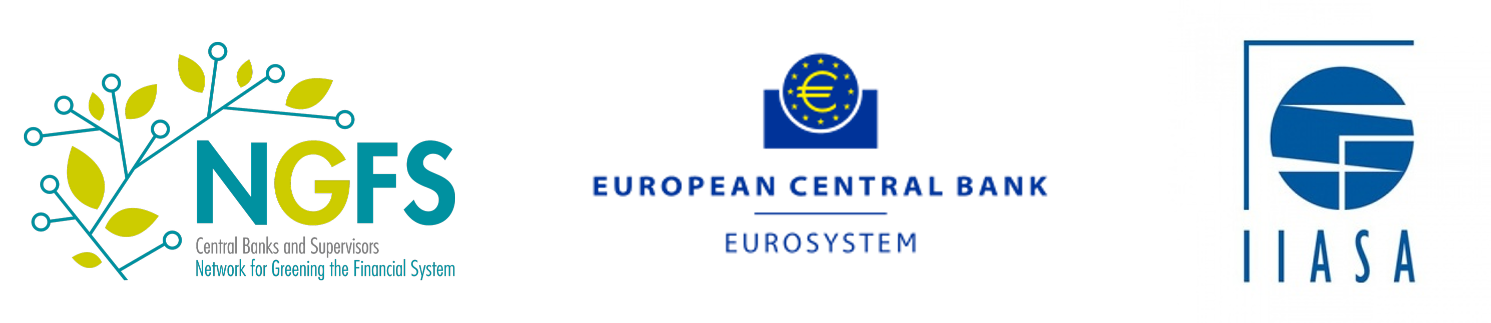